Project 2- ASL Image classification


Name-Arunkumar Ramachandran


Student ID-903928488

## Load Packages

In [2]:
import keras
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
from random import randint
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection

## Loading the dataset

In [ ]:
!unzip -d '/content/drive/My Drive/ASL/' '/content/drive/My Drive/ASL/asl-alphabet.zip'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: /content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: /content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: /content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: /content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: /content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: /content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: /content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: /content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inf

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
%cd /content/drive/My\ Drive/ASL

/content/drive/My Drive/ASL


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

401 - Unauthorized


In [ ]:
'''import os 
import shutil

for folder in os.listdir("/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/"):
    i = 0
    #mk = "/content/drive/My Drive/ASL/asl_alphabet_test/asl_alphabet_test/" + str(folder) 
    #os.mkdir(mk)
    for item in os.listdir("/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/" + str(folder) + "/"):
        print("/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/" + str(folder))
        print(item)
        if(i == 12711):
            break
        dest = "/content/drive/My Drive/ASL/asl_alphabet_test/New_test_data/" + str(folder) +"/"
        #+ "/Img_" + str(i) + ".jpeg"
        #shutil.move("/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/" + str(folder) + "/" + item, dest)
        if (os.path.exists("/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/" + str(folder) + "/" + item)):
            continue
            i = i + 1
        else:
            shutil.move("/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/" + str(folder) + "/" + item, dest)
            i += 1
            '''

Streaming output truncated to the last 5000 lines.
space1449.jpg
/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/space
space145.jpg
/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/space
space1450.jpg
/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/space
space1451.jpg
/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/space
space1452.jpg
/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/space
space1453.jpg
/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/space
space1454.jpg
/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/space
space1455.jpg
/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/space
space1456.jpg
/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/space
space1457.jpg
/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/space
space1458.jpg
/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/space
spac

In [ ]:
!mkdir /content/drive/My\ Drive/ASL/asl_alphabet_test/New_test_data/del

In [ ]:
!pip install split-folders tqdm

## Preprocessing Dataset

# Testing different images by resizing

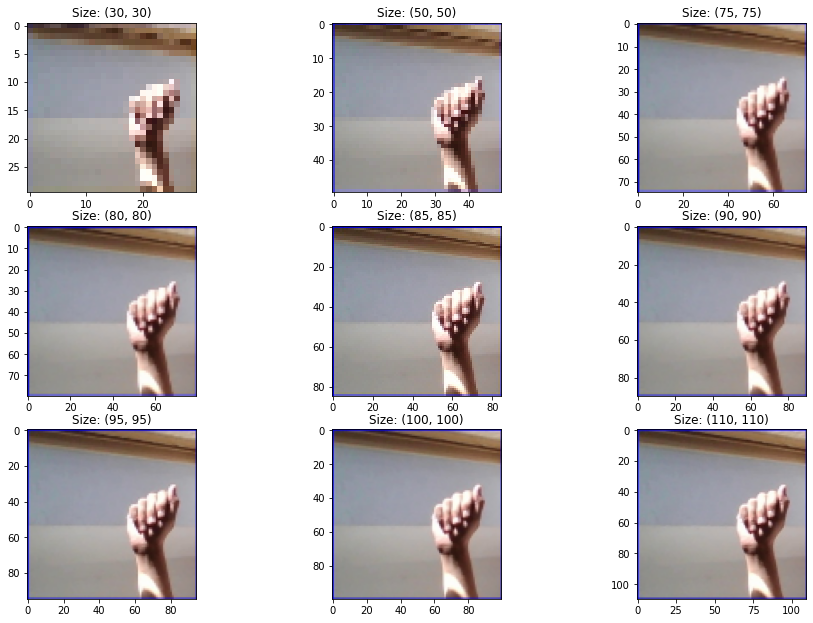

In [ ]:
resize = [(30,30),(50,50),(75,75),(80,80),(85,85),(90,90),(95,95),(100,100),(110,110)]



image = cv2.cvtColor(cv2.imread('/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/A/A1000.jpg'), cv2.COLOR_BGR2RGB)

h,ax = plt.subplots(3,3) 
h.subplots_adjust(0,0,2,2)
index = 0
for i in range(0,3,1):
    for j in range(0,3,1):
        
        # rnd_number = randint(0,len(Images))
        ax[i,j].imshow(cv2.resize(image,resize[index]))
        ax[i,j].set_title('Size: ' + str(resize[index]))  
        index +=1

Moving forward with size(75x75).

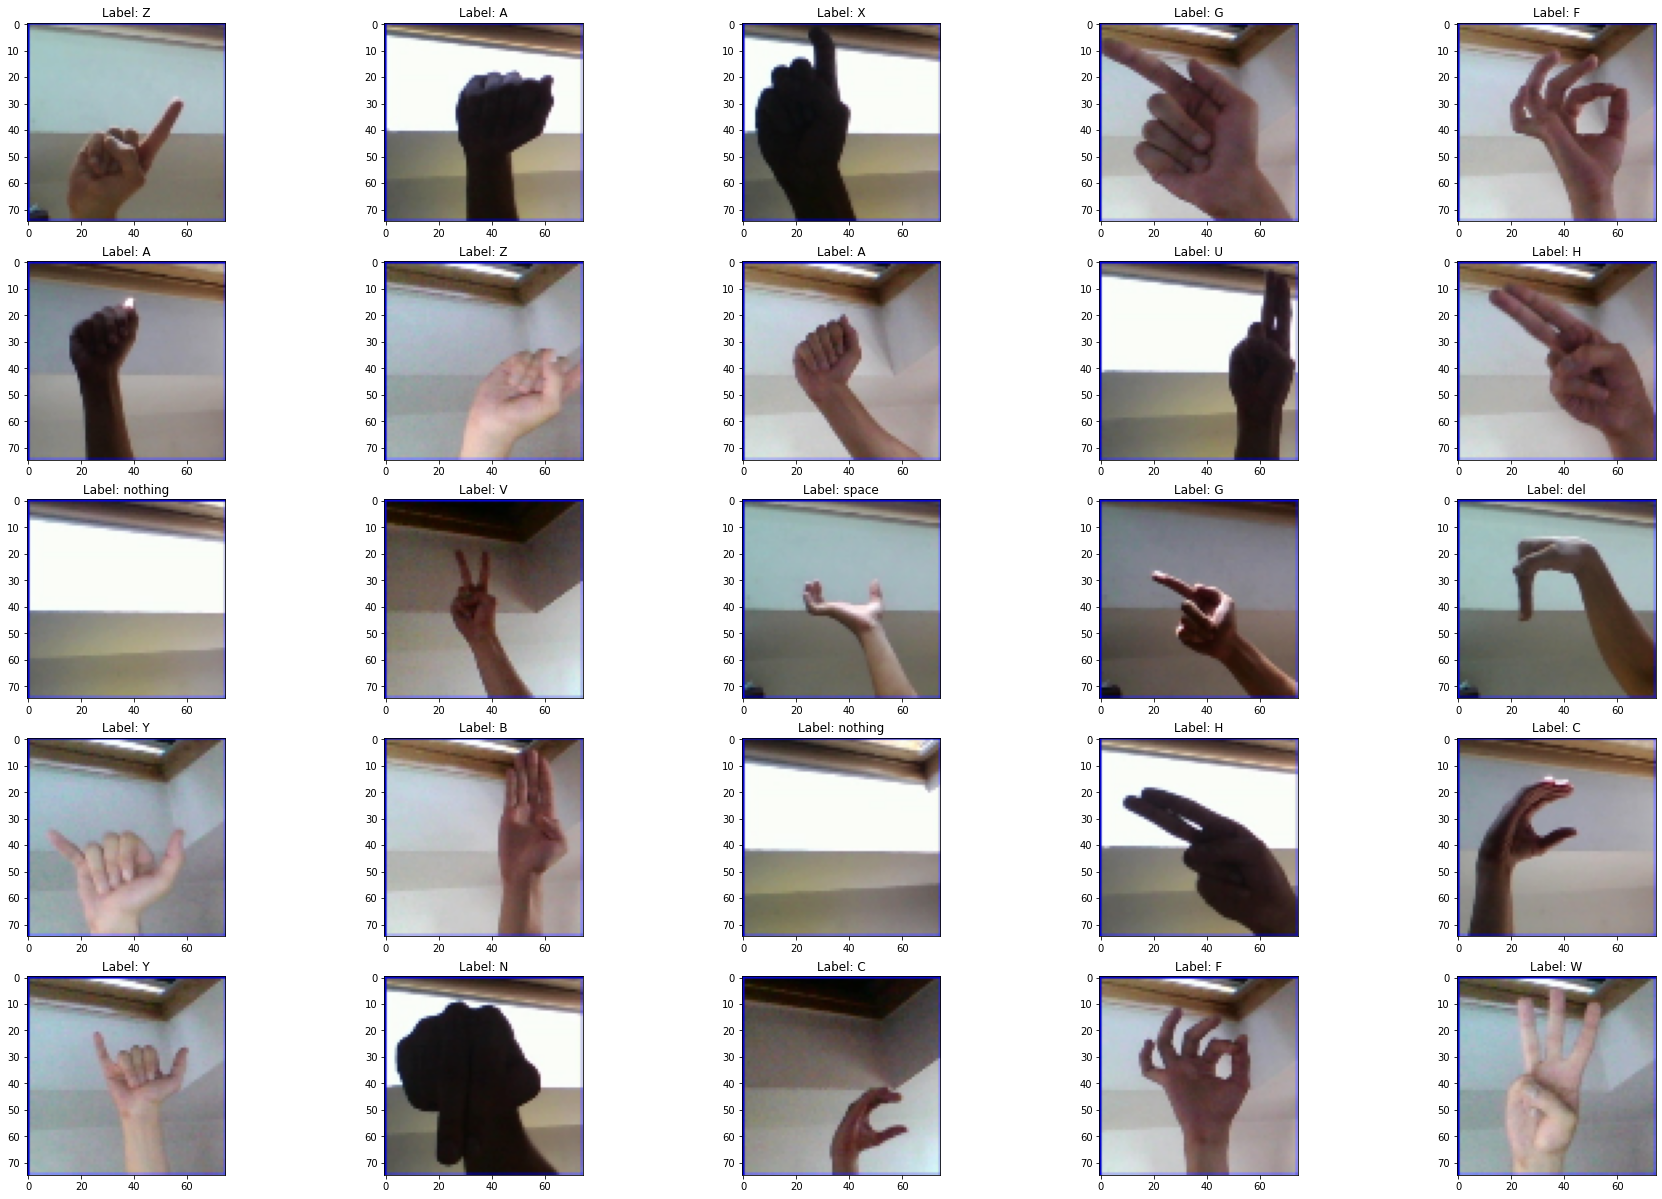

In [ ]:
size = (75,75)

h,ax = plt.subplots(5,5) 
h.subplots_adjust(0,0,4,4)

for i in range(0,5,1):
    for j in range(0,5,1):
        directory='/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/'
        labels = len(os.listdir(directory))
        rnd_number1 = randint(0,labels-1)
        label_name = os.listdir(directory)[rnd_number1]
        directory = directory + '/' + os.listdir(directory)[rnd_number1]
        images = len(os.listdir(directory))
        rnd_number2 = randint(0,images-1)

        image = cv2.cvtColor(cv2.imread(directory + '/' + os.listdir(directory)[rnd_number2]), cv2.COLOR_BGR2RGB)
        ax[i,j].imshow(cv2.resize(image,size))
        ax[i,j].set_title('Label: ' + label_name)
        


In [ ]:
def get_data():
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []

    for folderName in os.listdir():
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in tqdm(os.listdir(folderName)):
                img_file = cv2.imread(folderName + '/' + image_filename)
                if img_file is not None:
                    #img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    image = np.asarray(img_file)
                    image=cv2.resize(image, (75, 75))
                    X.append(image)
                    y.append(label)

    X = np.array(X)
    y = np.array(y)
    print("Shape of X:",X.shape)
    print("Shape of y:",y.shape)        
    return shuffle(X,y,random_state=1)
X,y = get_data() 

100%|█████████████████████████████████████████████████████████████████████████████| 3001/3001 [00:05<00:00, 530.83it/s]


Shape of X: (87028, 75, 75, 3)
Shape of y: (87028,)


# Pickle:

In [ ]:
'''
import pickle
dictionary = {'features': X,
             'labels': y}
with open('dataset.pickle','wb') as data_file:
    pickle.dump(dictionary, data_file)

In [5]:
import pickle
data = pickle.load(open('dataset.pickle','rb'))

In [ ]:
print(data['labels'].shape)
print(data['features'].shape)

(87028,)
(87028, 75, 75, 3)


In [6]:
X = data['features']
y = data['labels']

## Normalization Methods

## Normalizing Method 1

In [7]:
############################################################################################################################## 
#Normalizing 1

(trainX, valX, trainY, valY) = train_test_split(X[:10000], y[:10000], test_size=0.20, random_state=1)

trainX = trainX.astype('float32')/255.0
valX = valX.astype('float32')/255.0

print(trainX.shape)
print(trainY.shape)
print(valX.shape)
print(valY.shape)

(8000, 75, 75, 3)
(8000,)
(2000, 75, 75, 3)
(2000,)


In [ ]:
print(trainX)
print(valX)

[[[[240   3   0]
   [196   6  12]
   [195   9  10]
   ...
   [197   7   8]
   [199   9  13]
   [219   3   6]]

  [[198   7  10]
   [ 65  94 101]
   [ 68 100 109]
   ...
   [ 63  73  93]
   [115 130 138]
   [201 111 110]]

  [[197   6  14]
   [ 46  61  83]
   [ 49  70  85]
   ...
   [131 146 143]
   [130 139 133]
   [204 111 105]]

  ...

  [[202   6   4]
   [205 203 185]
   [199 200 189]
   ...
   [131 139 139]
   [123 137 139]
   [202 111 105]]

  [[203   7   3]
   [198 203 181]
   [198 199 190]
   ...
   [123 133 141]
   [116 138 145]
   [203 114 113]]

  [[219   3   1]
   [236 162 149]
   [235 160 152]
   ...
   [204 110 110]
   [200 108 109]
   [232  88  83]]]


 [[[238   1   0]
   [196   6  11]
   [194   7   6]
   ...
   [197   6   9]
   [197   5  10]
   [223   6   5]]

  [[197   6   9]
   [ 60  85  90]
   [ 67  89  97]
   ...
   [ 73  87  98]
   [121 132 132]
   [203 110 101]]

  [[197   8  11]
   [ 47  66  70]
   [ 52  63  66]
   ...
   [132 136 138]
   [137 141 132]
   [203 113

In [ ]:

class LeNet:
    # create the architecture
    def build(height, width, depth, classes):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with 20 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(32, (5, 5), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        
        # add another convolutional layer with 50 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(64, (5, 5), padding= 'same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        
        # add another convolutional layer
        model.add(Conv2D(128, (5, 5), padding = 'same'))
        model.add(Activation('relu'))
        
        # add a fully-connected layer
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        
        # add a softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the constructed model
        return model

[INFO] training network...
Epoch 1/100
50/50 [==============================] - 2s 42ms/step - loss: 3.1999 - accuracy: 0.1195 - val_loss: 2.6329 - val_accuracy: 0.2375
Epoch 2/100
50/50 [==============================] - 2s 38ms/step - loss: 2.1770 - accuracy: 0.3611 - val_loss: 1.8124 - val_accuracy: 0.4456
Epoch 3/100
50/50 [==============================] - 2s 38ms/step - loss: 1.3918 - accuracy: 0.5702 - val_loss: 1.2603 - val_accuracy: 0.6244
Epoch 4/100
50/50 [==============================] - 2s 38ms/step - loss: 0.8485 - accuracy: 0.7314 - val_loss: 0.9385 - val_accuracy: 0.7106
Epoch 5/100
50/50 [==============================] - 2s 38ms/step - loss: 0.5270 - accuracy: 0.8259 - val_loss: 0.8166 - val_accuracy: 0.7531
Epoch 6/100
50/50 [==============================] - 2s 38ms/step - loss: 0.3481 - accuracy: 0.8859 - val_loss: 0.6972 - val_accuracy: 0.8150
Epoch 7/100
50/50 [==============================] - 2s 39ms/step - loss: 0.2497 - accuracy: 0.9228 - val_loss: 0.7020 - 

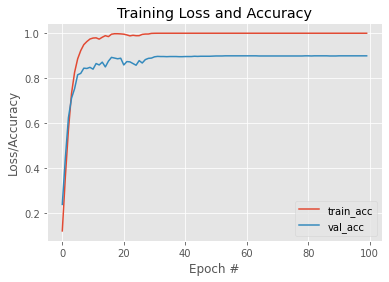

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)



model = LeNet.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 100
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

From above, we can see that 93 percent is the highest accuracy achieved.

## Normalizing method 2

In [ ]:
from torchvision import transforms

(trainX, valX, trainY, valY) = train_test_split(X[:10000], y[:10000], test_size=0.20, random_state=1)

#Mean and std deviation for trainX
mean = trainX.mean(axis=(0,1,2))
std = trainX.std(axis=(0,1,2))
print(mean,std)

#Mean and std for valX
mean_2 = valX.mean(axis=(0,1,2))
std_2 = valX.std(axis=(0,1,2))
print(mean_2,std_2)

#Normalize trainX

train_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean,std)])
#Normalize valX
valid_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean_2,std_2)])


print(trainX.shape)
print(valX.shape)

[131.42447873 127.0583638  132.15750736] [66.65213616 64.49961312 57.4409279 ]
[132.03767502 127.70541129 132.75568729] [66.42018716 64.28376307 57.1662313 ]
(8000, 75, 75, 3)
(2000, 75, 75, 3)


In [ ]:
print(mean)
print(mean_2)
print(std)
print(std_2)
print(train_transform)
print(valid_transform)

[131.42447873 127.0583638  132.15750736]
[132.03767502 127.70541129 132.75568729]
[66.65213616 64.49961312 57.4409279 ]
[66.42018716 64.28376307 57.1662313 ]
Compose(
    ToPILImage()
    ToTensor()
    Normalize(mean=[131.42447873 127.0583638  132.15750736], std=[66.65213616 64.49961312 57.4409279 ])
)
Compose(
    ToPILImage()
    ToTensor()
    Normalize(mean=[132.03767502 127.70541129 132.75568729], std=[66.42018716 64.28376307 57.1662313 ])
)


[INFO] training network...
Epoch 1/100
50/50 [==============================] - 2s 39ms/step - loss: 20.8838 - accuracy: 0.1120 - val_loss: 2.7572 - val_accuracy: 0.2006
Epoch 2/100
50/50 [==============================] - 2s 35ms/step - loss: 2.3909 - accuracy: 0.3036 - val_loss: 2.2752 - val_accuracy: 0.3313
Epoch 3/100
50/50 [==============================] - 2s 35ms/step - loss: 1.7272 - accuracy: 0.4711 - val_loss: 1.6367 - val_accuracy: 0.4950
Epoch 4/100
50/50 [==============================] - 2s 35ms/step - loss: 1.2405 - accuracy: 0.5964 - val_loss: 1.4143 - val_accuracy: 0.5650
Epoch 5/100
50/50 [==============================] - 2s 35ms/step - loss: 0.9183 - accuracy: 0.6961 - val_loss: 1.2478 - val_accuracy: 0.6488
Epoch 6/100
50/50 [==============================] - 2s 35ms/step - loss: 0.7239 - accuracy: 0.7669 - val_loss: 1.1622 - val_accuracy: 0.6656
Epoch 7/100
50/50 [==============================] - 2s 35ms/step - loss: 0.5771 - accuracy: 0.8044 - val_loss: 1.1490 -

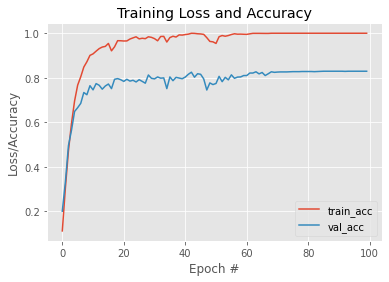

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)



model = LeNet.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 100
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

After picking normalizing method, we move forward to determine the right network archotecture.

In [ ]:
############################################################################################################################## 
#Normalizing 1

(trainX, valX, trainY, valY) = train_test_split(X[:10000], y[:10000], test_size=0.20, random_state=1)

trainX = trainX.astype('float32')/255.0
valX = valX.astype('float32')/255.0

print(trainX.shape)
print(trainY.shape)
print(valX.shape)
print(valY.shape)

(8000, 75, 75, 3)
(8000,)
(2000, 75, 75, 3)
(2000,)


# Network Architecture

## We will use different Network architecture and pick the best out of them. Some of the netwroks I plan on trying include:
1. LeNet
2. AlexNet
3. VGG16 
4. ResNet50
5. VGG19
6. Mini VGG


## 1. LeNet

In [ ]:
class LeNet:
    # create the architecture
    def build(height, width, depth, classes):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with 20 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(32, (5, 5), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        
        # add another convolutional layer with 50 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(64, (5, 5), padding= 'same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        
        # add another convolutional layer
        model.add(Conv2D(128, (5, 5), padding = 'same'))
        model.add(Activation('relu'))
        
        # add a fully-connected layer
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        
        # add a softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the constructed model
        return model

[INFO] training network...
Epoch 1/100
50/50 [==============================] - 2s 42ms/step - loss: 3.2821 - accuracy: 0.0809 - val_loss: 2.8274 - val_accuracy: 0.1975
Epoch 2/100
50/50 [==============================] - 2s 38ms/step - loss: 2.3201 - accuracy: 0.3113 - val_loss: 1.8572 - val_accuracy: 0.4300
Epoch 3/100
50/50 [==============================] - 2s 38ms/step - loss: 1.4602 - accuracy: 0.5495 - val_loss: 1.2957 - val_accuracy: 0.6006
Epoch 4/100
50/50 [==============================] - 2s 38ms/step - loss: 0.9033 - accuracy: 0.7123 - val_loss: 1.0527 - val_accuracy: 0.6687
Epoch 5/100
50/50 [==============================] - 2s 38ms/step - loss: 0.5681 - accuracy: 0.8181 - val_loss: 0.7948 - val_accuracy: 0.7681
Epoch 6/100
50/50 [==============================] - 2s 38ms/step - loss: 0.3768 - accuracy: 0.8786 - val_loss: 0.7061 - val_accuracy: 0.8125
Epoch 7/100
50/50 [==============================] - 2s 38ms/step - loss: 0.2560 - accuracy: 0.9156 - val_loss: 0.5572 - 

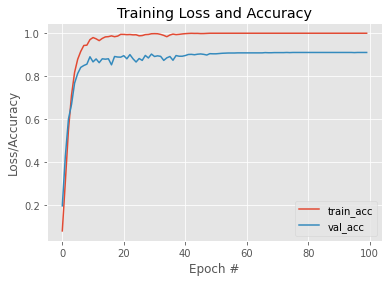

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)



model = LeNet.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 100
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 2. AlexNet (2012)

In [ ]:
class AlexNet:
    def build(height, width, depth, classes, lambda2 = 0.0002):
        model = Sequential(name = 'AlexNet')
        
        model.add(Conv2D(96, (11, 11), strides = (4, 4), input_shape = (height, width, depth),
                         padding='same', kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(256, (5, 5), padding = 'same', kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(384, (3, 3), padding = 'same', kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(Conv2D(384, (3, 3), padding = 'same', kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(Conv2D(256, (3, 3), padding = 'same', kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        
        model.add(Dense(4096, kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        model.add(Dense(4096, kernel_regularizer = l2(lambda2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        model.add(Dense(classes, kernel_regularizer = l2(lambda2)))
        model.add(Activation('softmax'))
        
        return model

[INFO] training network...
Epoch 1/100
50/50 [==============================] - 2s 41ms/step - loss: 5.8175 - accuracy: 0.1095 - val_loss: 23.1987 - val_accuracy: 0.0306
Epoch 2/100
50/50 [==============================] - 2s 35ms/step - loss: 4.6625 - accuracy: 0.2148 - val_loss: 5.3432 - val_accuracy: 0.0650
Epoch 3/100
50/50 [==============================] - 2s 35ms/step - loss: 3.9095 - accuracy: 0.3356 - val_loss: 5.0259 - val_accuracy: 0.1388
Epoch 4/100
50/50 [==============================] - 2s 34ms/step - loss: 3.5194 - accuracy: 0.4092 - val_loss: 11.8138 - val_accuracy: 0.1044
Epoch 5/100
50/50 [==============================] - 2s 34ms/step - loss: 3.0827 - accuracy: 0.5050 - val_loss: 12.5688 - val_accuracy: 0.1813
Epoch 6/100
50/50 [==============================] - 2s 34ms/step - loss: 2.7169 - accuracy: 0.5897 - val_loss: 5.8764 - val_accuracy: 0.2494
Epoch 7/100
50/50 [==============================] - 2s 35ms/step - loss: 2.5269 - accuracy: 0.6350 - val_loss: 4.6422

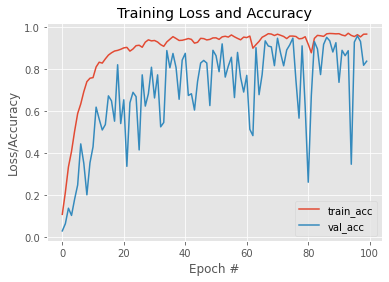

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = AlexNet.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 100
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 3. VGG 16 (2014)

In [ ]:
class VGGNet16:
    def build(height, width, depth, classes):
        model = Sequential(name = 'VGGNet16')
        
        # conv 1
        model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 3
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 5
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 8
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 9
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 11
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 13
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        
        # fc 14
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 15
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 16
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/100
50/50 [==============================] - 14s 289ms/step - loss: 4.1027 - accuracy: 0.0911 - val_loss: 57.1702 - val_accuracy: 0.0281
Epoch 2/100
50/50 [==============================] - 14s 280ms/step - loss: 2.9415 - accuracy: 0.2206 - val_loss: 10.8063 - val_accuracy: 0.0381
Epoch 3/100
50/50 [==============================] - 14s 285ms/step - loss: 2.1967 - accuracy: 0.3587 - val_loss: 15.7940 - val_accuracy: 0.0381
Epoch 4/100
50/50 [==============================] - 14s 290ms/step - loss: 1.6610 - accuracy: 0.4856 - val_loss: 13.3123 - val_accuracy: 0.0375
Epoch 5/100
50/50 [==============================] - 15s 292ms/step - loss: 1.3494 - accuracy: 0.5756 - val_loss: 15.7824 - val_accuracy: 0.0375
Epoch 6/100
50/50 [==============================] - 15s 298ms/step - loss: 1.1268 - accuracy: 0.6398 - val_loss: 16.4880 - val_accuracy: 0.0425
Epoch 7/100
50/50 [==============================] - 15s 306ms/step - loss: 0.7948 - accuracy: 0.7320 -

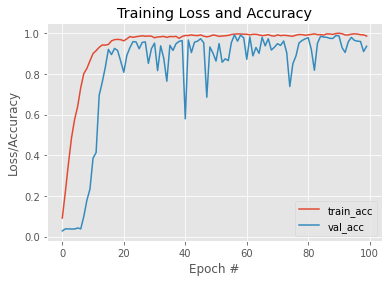

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)



model = VGGNet16.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 100
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Mini VGG

In [ ]:
class MiniVGGNet:
    def build(height, width, depth, classes):
        model = Sequential(name = 'MiniVGGNet')
        
        model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(Conv2D(32, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        return model

[INFO] training network...
Epoch 1/100
50/50 [==============================] - 4s 70ms/step - loss: 2.8059 - accuracy: 0.2802 - val_loss: 4.4417 - val_accuracy: 0.0381
Epoch 2/100
50/50 [==============================] - 3s 65ms/step - loss: 1.3914 - accuracy: 0.5789 - val_loss: 6.8114 - val_accuracy: 0.0381
Epoch 3/100
50/50 [==============================] - 3s 66ms/step - loss: 0.7839 - accuracy: 0.7570 - val_loss: 10.8392 - val_accuracy: 0.0381
Epoch 4/100
50/50 [==============================] - 3s 65ms/step - loss: 0.5053 - accuracy: 0.8434 - val_loss: 11.1536 - val_accuracy: 0.0381
Epoch 5/100
50/50 [==============================] - 3s 66ms/step - loss: 0.3319 - accuracy: 0.9056 - val_loss: 16.1931 - val_accuracy: 0.0394
Epoch 6/100
50/50 [==============================] - 3s 66ms/step - loss: 0.2381 - accuracy: 0.9344 - val_loss: 11.2906 - val_accuracy: 0.0381
Epoch 7/100
50/50 [==============================] - 3s 65ms/step - loss: 0.1758 - accuracy: 0.9533 - val_loss: 9.148

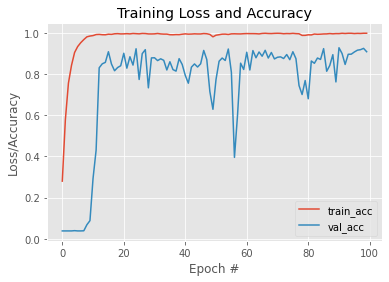

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = MiniVGGNet.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 100
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## VGG 19 (2014)

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 3
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 5
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 9
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 13
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 18
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 19
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/100
50/50 [==============================] - 16s 322ms/step - loss: 4.1072 - accuracy: 0.0869 - val_loss: 611.5272 - val_accuracy: 0.0362
Epoch 2/100
50/50 [==============================] - 16s 313ms/step - loss: 2.9275 - accuracy: 0.1964 - val_loss: 15.6880 - val_accuracy: 0.0281
Epoch 3/100
50/50 [==============================] - 16s 314ms/step - loss: 2.3336 - accuracy: 0.3214 - val_loss: 27.9654 - val_accuracy: 0.0381
Epoch 4/100
50/50 [==============================] - 16s 317ms/step - loss: 2.0023 - accuracy: 0.4067 - val_loss: 14.8789 - val_accuracy: 0.0294
Epoch 5/100
50/50 [==============================] - 16s 320ms/step - loss: 1.6926 - accuracy: 0.4852 - val_loss: 26.7415 - val_accuracy: 0.0381
Epoch 6/100
50/50 [==============================] - 16s 321ms/step - loss: 1.3619 - accuracy: 0.5769 - val_loss: 24.5659 - val_accuracy: 0.0381
Epoch 7/100
50/50 [==============================] - 16s 323ms/step - loss: 1.2477 - accuracy: 0.6245 

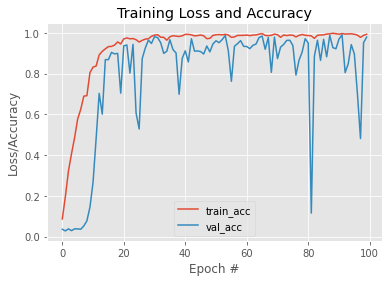

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 100
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# HW-7: Modern CNN Architecture:

## ResNet 50 (2015)

In [ ]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
def ResNet50(input_shape=(75, 75, 3), classes=29):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model


[INFO] training network...
Epoch 1/100
50/50 [==============================] - 11s 222ms/step - loss: 3.4598 - accuracy: 0.1467 - val_loss: 3.5817 - val_accuracy: 0.0381
Epoch 2/100
50/50 [==============================] - 10s 208ms/step - loss: 1.4600 - accuracy: 0.5250 - val_loss: 5.1157 - val_accuracy: 0.0381
Epoch 3/100
50/50 [==============================] - 11s 212ms/step - loss: 0.8155 - accuracy: 0.7247 - val_loss: 10.3183 - val_accuracy: 0.0381
Epoch 4/100
50/50 [==============================] - 11s 214ms/step - loss: 0.5554 - accuracy: 0.8134 - val_loss: 16.2779 - val_accuracy: 0.0381
Epoch 5/100
50/50 [==============================] - 11s 211ms/step - loss: 0.3182 - accuracy: 0.8917 - val_loss: 14.3939 - val_accuracy: 0.0381
Epoch 6/100
50/50 [==============================] - 10s 209ms/step - loss: 0.1874 - accuracy: 0.9358 - val_loss: 13.2371 - val_accuracy: 0.0381
Epoch 7/100
50/50 [==============================] - 10s 207ms/step - loss: 0.1501 - accuracy: 0.9505 - v

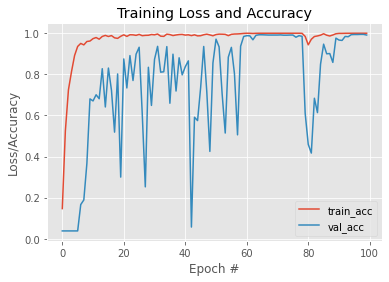

In [ ]:
from tensorflow.keras import backend
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import add
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelBinarizer
from keras.layers import  ZeroPadding2D
from keras.layers import  Add
from keras.initializers import glorot_uniform
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


tf.keras.backend.clear_session()

trainY = to_categorical(trainY, 29)
valY = to_categorical(valY, 29)



model = ResNet50(input_shape = (75, 75, 3), classes = 29)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("[INFO] training network...")
maxIt = 100
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

I will be using VGG-19 to tune my hyperparameters.

# Tuning Hyperparameters:

In [ ]:
##############################################################################################################################  
# Tune the hyperparameters

Drop_out = [0,0.01,  0.2 , 0.3 , 0.4, 0.5,0.6,0.7,0.8,0.9] 
Filter_size = [ 4,16, 32, 64, 128, 256] #Number of Filters 1
Filter_size2 = [ 4,16, 32, 64, 128, 256 ] #Number of Filters 2
Filter_size3 = [ 4,16, 32, 64, 128, 256 ] #Number of filters 3
Filter_size4 = [ 4,16, 32, 64, 128, 256 ] #Number of filters 4
Layer_Size= [(1,1), (3,3), (5,5), (7,7),(9,9),(11,11)] #Kernel/Filter size
L1 = [1e-1 , 1e-2 , 1e-3 , 0 , 1e-4, 1e-5] #Kernel Regularizer
L2 = [1e-1 , 1e-2 , 1e-3 , 0 , 1e-4, 1e-5]#Kernel Regularizer
L_1 = [1e-1 , 1e-2 , 1e-3 , 0 , 1e-4, 1e-5] #Activity Regularizer
L_2 = [1e-1 , 1e-2 , 1e-3 , 0 , 1e-4, 1e-5]#Activity Regularizer
poolsize =  [(1,1),(2,2),(3,3)]

# Activation Funtion

## Relu:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 3
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 5
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 9
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 13
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 18
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 19
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/25
50/50 [==============================] - 10s 190ms/step - loss: 4.0488 - accuracy: 0.0884 - val_loss: 20.1827 - val_accuracy: 0.0388
Epoch 2/25
50/50 [==============================] - 9s 175ms/step - loss: 2.8226 - accuracy: 0.2294 - val_loss: 3.9178 - val_accuracy: 0.0356
Epoch 3/25
50/50 [==============================] - 9s 174ms/step - loss: 2.2571 - accuracy: 0.3545 - val_loss: 10.0129 - val_accuracy: 0.0394
Epoch 4/25
50/50 [==============================] - 9s 173ms/step - loss: 1.7857 - accuracy: 0.4663 - val_loss: 10.9376 - val_accuracy: 0.0394
Epoch 5/25
50/50 [==============================] - 9s 173ms/step - loss: 1.4746 - accuracy: 0.5447 - val_loss: 17.0080 - val_accuracy: 0.0381
Epoch 6/25
50/50 [==============================] - 9s 173ms/step - loss: 1.2758 - accuracy: 0.6022 - val_loss: 10.8456 - val_accuracy: 0.0388
Epoch 7/25
50/50 [==============================] - 9s 174ms/step - loss: 1.0837 - accuracy: 0.6661 - val_loss: 9.7

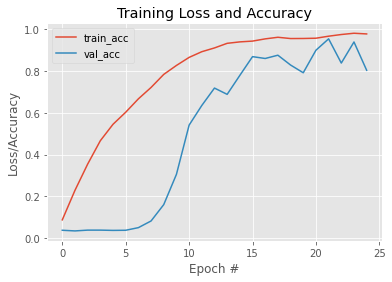

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 25
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Sigmoid:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 3
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 5
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        # conv 7
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 9
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        # conv 12
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 13
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 18
        model.add(Dense(4096))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 19
        model.add(Dense(1000))
        model.add(Activation('sigmoid'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/25
50/50 [==============================] - 19s 374ms/step - loss: 3.3390 - accuracy: 0.0789 - val_loss: 3.5488 - val_accuracy: 0.0356
Epoch 2/25
50/50 [==============================] - 19s 374ms/step - loss: 2.9087 - accuracy: 0.1020 - val_loss: 3.7777 - val_accuracy: 0.0356
Epoch 3/25
50/50 [==============================] - 19s 374ms/step - loss: 2.7663 - accuracy: 0.1231 - val_loss: 4.5288 - val_accuracy: 0.0381
Epoch 4/25
50/50 [==============================] - 18s 365ms/step - loss: 2.6600 - accuracy: 0.1305 - val_loss: 5.0367 - val_accuracy: 0.0400
Epoch 5/25
50/50 [==============================] - 18s 362ms/step - loss: 2.5451 - accuracy: 0.1575 - val_loss: 4.5790 - val_accuracy: 0.0538
Epoch 6/25
50/50 [==============================] - 18s 365ms/step - loss: 2.4542 - accuracy: 0.1659 - val_loss: 5.3139 - val_accuracy: 0.0512
Epoch 7/25
50/50 [==============================] - 18s 369ms/step - loss: 2.3106 - accuracy: 0.1887 - val_loss: 6.

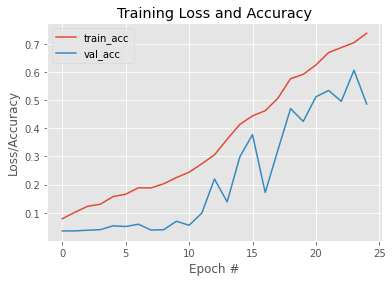

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 25
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Tanh:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 3
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 5
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        # conv 7
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 9
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        # conv 12
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 13
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 18
        model.add(Dense(4096))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 19
        model.add(Dense(1000))
        model.add(Activation('tanh'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/25
50/50 [==============================] - 10s 195ms/step - loss: 4.6754 - accuracy: 0.0566 - val_loss: 3.6049 - val_accuracy: 0.0312
Epoch 2/25
50/50 [==============================] - 9s 182ms/step - loss: 3.7825 - accuracy: 0.0823 - val_loss: 4.2249 - val_accuracy: 0.0406
Epoch 3/25
50/50 [==============================] - 9s 182ms/step - loss: 3.4366 - accuracy: 0.1122 - val_loss: 4.2833 - val_accuracy: 0.0538
Epoch 4/25
50/50 [==============================] - 9s 182ms/step - loss: 3.1426 - accuracy: 0.1587 - val_loss: 4.4304 - val_accuracy: 0.0437
Epoch 5/25
50/50 [==============================] - 9s 183ms/step - loss: 2.8390 - accuracy: 0.1947 - val_loss: 4.2968 - val_accuracy: 0.0856
Epoch 6/25
50/50 [==============================] - 9s 182ms/step - loss: 2.5443 - accuracy: 0.2550 - val_loss: 3.1836 - val_accuracy: 0.1631
Epoch 7/25
50/50 [==============================] - 9s 183ms/step - loss: 2.2898 - accuracy: 0.3059 - val_loss: 3.5300 -

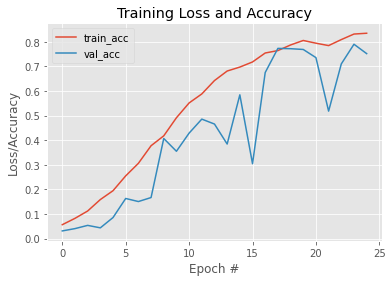

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 25
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Softmax:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 3
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 5
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        # conv 7
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 9
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        # conv 12
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 13
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 18
        model.add(Dense(4096))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 19
        model.add(Dense(1000))
        model.add(Activation('softmax'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/25
50/50 [==============================] - 26s 517ms/step - loss: 3.3681 - accuracy: 0.0380 - val_loss: 3.3674 - val_accuracy: 0.0388
Epoch 2/25
50/50 [==============================] - 26s 514ms/step - loss: 3.3675 - accuracy: 0.0366 - val_loss: 3.3677 - val_accuracy: 0.0319
Epoch 3/25
50/50 [==============================] - 25s 504ms/step - loss: 3.3675 - accuracy: 0.0375 - val_loss: 3.3674 - val_accuracy: 0.0388
Epoch 4/25
50/50 [==============================] - 25s 504ms/step - loss: 3.3674 - accuracy: 0.0367 - val_loss: 3.3679 - val_accuracy: 0.0388
Epoch 5/25
50/50 [==============================] - 25s 507ms/step - loss: 3.3675 - accuracy: 0.0364 - val_loss: 3.3672 - val_accuracy: 0.0388
Epoch 6/25
50/50 [==============================] - 25s 508ms/step - loss: 3.3676 - accuracy: 0.0339 - val_loss: 3.3672 - val_accuracy: 0.0388
Epoch 7/25
50/50 [==============================] - 25s 507ms/step - loss: 3.3672 - accuracy: 0.0359 - val_loss: 3.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


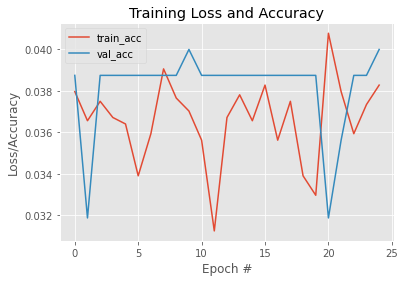

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 25
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Loss Functions:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 3
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 5
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 9
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 13
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 18
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 19
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))                
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

## Mean_Squared_Error:

[INFO] training network...
Epoch 1/25
50/50 [==============================] - 17s 345ms/step - loss: 0.0374 - accuracy: 0.0487 - val_loss: 0.0664 - val_accuracy: 0.0375
Epoch 2/25
50/50 [==============================] - 17s 347ms/step - loss: 0.0346 - accuracy: 0.0894 - val_loss: 0.0661 - val_accuracy: 0.0362
Epoch 3/25
50/50 [==============================] - 17s 348ms/step - loss: 0.0335 - accuracy: 0.1375 - val_loss: 0.0512 - val_accuracy: 0.0312
Epoch 4/25
50/50 [==============================] - 17s 341ms/step - loss: 0.0320 - accuracy: 0.1845 - val_loss: 0.0615 - val_accuracy: 0.0362
Epoch 5/25
50/50 [==============================] - 17s 339ms/step - loss: 0.0304 - accuracy: 0.2417 - val_loss: 0.0663 - val_accuracy: 0.0381
Epoch 6/25
50/50 [==============================] - 17s 339ms/step - loss: 0.0284 - accuracy: 0.3041 - val_loss: 0.0663 - val_accuracy: 0.0381
Epoch 7/25
50/50 [==============================] - 17s 342ms/step - loss: 0.0268 - accuracy: 0.3559 - val_loss: 0.

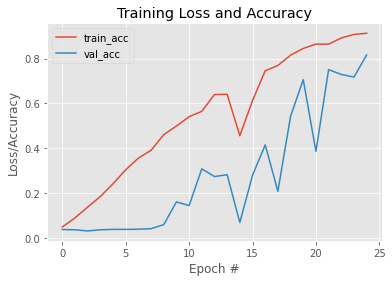

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 25
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## categorical_crossentropy

[INFO] training network...
Epoch 1/25
50/50 [==============================] - 17s 349ms/step - loss: 4.1093 - accuracy: 0.0838 - val_loss: 193.6944 - val_accuracy: 0.0281
Epoch 2/25
50/50 [==============================] - 18s 353ms/step - loss: 2.9962 - accuracy: 0.1869 - val_loss: 4.5051 - val_accuracy: 0.0325
Epoch 3/25
50/50 [==============================] - 17s 346ms/step - loss: 2.4086 - accuracy: 0.2897 - val_loss: 20.8112 - val_accuracy: 0.0381
Epoch 4/25
50/50 [==============================] - 17s 339ms/step - loss: 2.1054 - accuracy: 0.3652 - val_loss: 36.0043 - val_accuracy: 0.0381
Epoch 5/25
50/50 [==============================] - 17s 337ms/step - loss: 1.7511 - accuracy: 0.4563 - val_loss: 26.3904 - val_accuracy: 0.0381
Epoch 6/25
50/50 [==============================] - 17s 342ms/step - loss: 1.3594 - accuracy: 0.5541 - val_loss: 33.7970 - val_accuracy: 0.0381
Epoch 7/25
50/50 [==============================] - 17s 345ms/step - loss: 1.0899 - accuracy: 0.6433 - val_lo

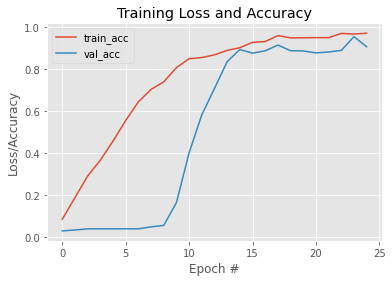

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 25
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Binary_categorical_crossentropy:

[INFO] training network...
Epoch 1/25
50/50 [==============================] - 9s 180ms/step - loss: 0.1772 - accuracy: 0.0945 - val_loss: 1.0138 - val_accuracy: 0.0381
Epoch 2/25
50/50 [==============================] - 9s 172ms/step - loss: 0.1344 - accuracy: 0.2148 - val_loss: 0.2967 - val_accuracy: 0.0369
Epoch 3/25
50/50 [==============================] - 9s 172ms/step - loss: 0.1138 - accuracy: 0.3231 - val_loss: 0.2147 - val_accuracy: 0.0431
Epoch 4/25
50/50 [==============================] - 9s 172ms/step - loss: 0.0985 - accuracy: 0.4089 - val_loss: 0.4142 - val_accuracy: 0.0306
Epoch 5/25
50/50 [==============================] - 9s 172ms/step - loss: 0.0908 - accuracy: 0.4558 - val_loss: 0.8977 - val_accuracy: 0.0406
Epoch 6/25
50/50 [==============================] - 9s 172ms/step - loss: 0.0729 - accuracy: 0.5775 - val_loss: 0.8356 - val_accuracy: 0.0475
Epoch 7/25
50/50 [==============================] - 9s 171ms/step - loss: 0.0637 - accuracy: 0.6247 - val_loss: 0.4484 - 

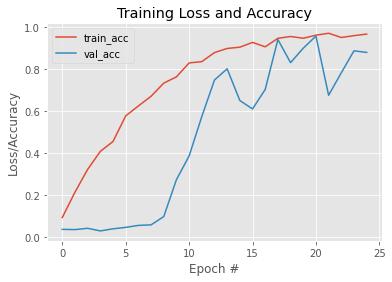

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29)
loss_fn = keras.losses.BinaryCrossentropy()
model.compile(loss = loss_fn, optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 25
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# HW-7: Data Augmentation:

## Horizontal and Vertical Shift Augmentation:

### Horizontal Shift:

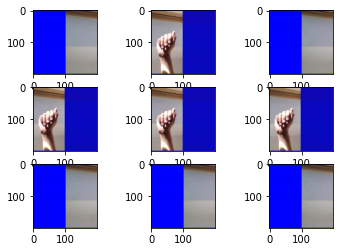

"\n# load the image\nimg = load_img('/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/A/A1000.jpg')\n# convert to numpy array\ndata = img_to_array(img)\n# expand dimension to one sample\nsamples = expand_dims(data, 0)\n# create image data augmentation generator\ndatagen = ImageDataGenerator(zoom_range=[0.5,1.0])\n# prepare iterator\nit = datagen.flow(samples, batch_size=1)\n# generate samples and plot\nfor i in range(9):\n\t# define subplot\n\tpyplot.subplot(330 + 1 + i)\n\t# generate batch of images\n\tbatch = it.next()\n\t# convert to unsigned integers for viewing\n\timage = batch[0].astype('uint8')\n\t# plot raw pixel data\n\tpyplot.imshow(image)\n# show the figure\npyplot.show()\n"

In [ ]:
# example of zoom image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
# create data generator
datagen = ImageDataGenerator()

# example of horizontal shift image augmentation
# load the image
img = load_img('/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/A/A1000.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-100,100])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

'''
# load the image
img = load_img('/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/A/A1000.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()
'''

### Vertical Shift:

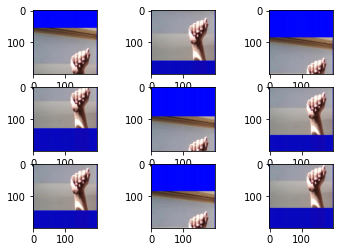

In [ ]:
# example of vertical shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/A/A1000.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

## Horizontal and Vertical FLip:

### Horizontal Flip:

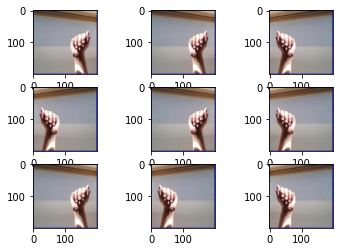

In [ ]:
# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = load_img('/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/A/A1000.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

### Vertical Flip:

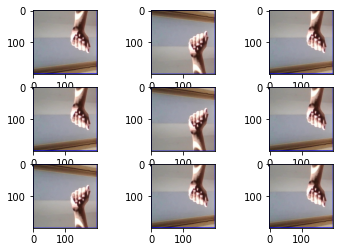

In [ ]:
# load the image
img = load_img('/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/A/A1000.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

## Random Rotation:

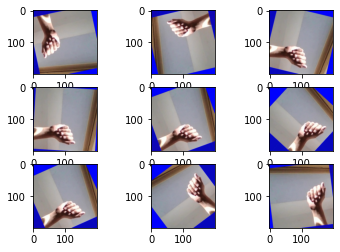

In [ ]:
# example of random rotation image augmentation

# load the image
img = load_img('/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/A/A1000.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=180)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

## Random Brightness Augmentation:

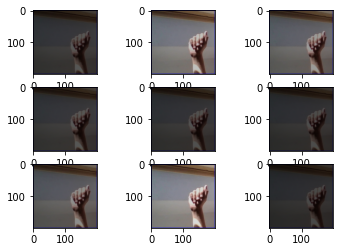

In [ ]:
# example of brighting image augmentation

# load the image
img = load_img('/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/A/A1000.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

## Random Zoom Augmentation:

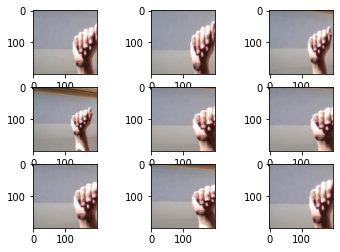

In [ ]:
# example of zoom image augmentation

# load the image
img = load_img('/content/drive/My Drive/ASL/asl_alphabet_train/asl_alphabet_train/A/A1000.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

On running the VGG19 class with categorical_crossentropy, we proceed forward.

## VGG19

[INFO] training network...
Epoch 1/25
50/50 [==============================] - 17s 330ms/step - loss: 4.0545 - accuracy: 0.0866 - val_loss: 170.8773 - val_accuracy: 0.0300
Epoch 2/25
50/50 [==============================] - 16s 322ms/step - loss: 2.9609 - accuracy: 0.1911 - val_loss: 15.1051 - val_accuracy: 0.0350
Epoch 3/25
50/50 [==============================] - 16s 328ms/step - loss: 2.4745 - accuracy: 0.3058 - val_loss: 7.7905 - val_accuracy: 0.0275
Epoch 4/25
50/50 [==============================] - 17s 335ms/step - loss: 2.0100 - accuracy: 0.4050 - val_loss: 8.2052 - val_accuracy: 0.0350
Epoch 5/25
50/50 [==============================] - 17s 344ms/step - loss: 1.8178 - accuracy: 0.4706 - val_loss: 13.4502 - val_accuracy: 0.0350
Epoch 6/25
50/50 [==============================] - 17s 346ms/step - loss: 1.4741 - accuracy: 0.5445 - val_loss: 14.3337 - val_accuracy: 0.0288
Epoch 7/25
50/50 [==============================] - 17s 343ms/step - loss: 1.2199 - accuracy: 0.6147 - val_los

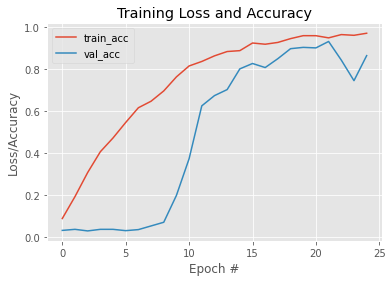

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 25

######################################################################################################################################################
aug = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,fill_mode='nearest')
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)
######################################################################################################################################################


print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## VGG16:

[INFO] training network...
Epoch 1/25
50/50 [==============================] - 15s 303ms/step - loss: 4.0184 - accuracy: 0.0986 - val_loss: 68.3500 - val_accuracy: 0.0338
Epoch 2/25
50/50 [==============================] - 15s 299ms/step - loss: 2.7720 - accuracy: 0.2508 - val_loss: 9.2507 - val_accuracy: 0.0338
Epoch 3/25
50/50 [==============================] - 15s 295ms/step - loss: 2.2106 - accuracy: 0.3688 - val_loss: 11.5718 - val_accuracy: 0.0394
Epoch 4/25
50/50 [==============================] - 14s 290ms/step - loss: 1.7658 - accuracy: 0.4717 - val_loss: 17.7208 - val_accuracy: 0.0381
Epoch 5/25
50/50 [==============================] - 14s 286ms/step - loss: 1.4093 - accuracy: 0.5619 - val_loss: 20.6561 - val_accuracy: 0.0381
Epoch 6/25
50/50 [==============================] - 14s 288ms/step - loss: 1.1340 - accuracy: 0.6509 - val_loss: 20.5715 - val_accuracy: 0.0381
Epoch 7/25
50/50 [==============================] - 14s 290ms/step - loss: 0.9606 - accuracy: 0.6992 - val_los

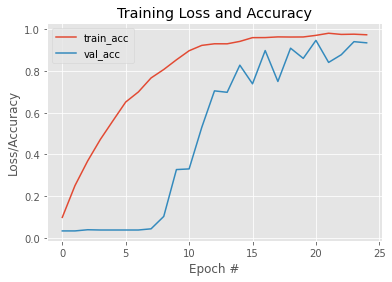

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)



model = VGGNet16.build(75, 75, 3, 29)


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 25

######################################################################################################################################################
aug = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,fill_mode='nearest')
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)
######################################################################################################################################################


print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## AlexNet:

[INFO] training network...
Epoch 1/25
50/50 [==============================] - 2s 42ms/step - loss: 5.9097 - accuracy: 0.1092 - val_loss: 19.0583 - val_accuracy: 0.0325
Epoch 2/25
50/50 [==============================] - 2s 35ms/step - loss: 4.5329 - accuracy: 0.2380 - val_loss: 6.1730 - val_accuracy: 0.0662
Epoch 3/25
50/50 [==============================] - 2s 35ms/step - loss: 3.6984 - accuracy: 0.3613 - val_loss: 7.3559 - val_accuracy: 0.1031
Epoch 4/25
50/50 [==============================] - 2s 35ms/step - loss: 3.1742 - accuracy: 0.4689 - val_loss: 8.8389 - val_accuracy: 0.1312
Epoch 5/25
50/50 [==============================] - 2s 36ms/step - loss: 2.9205 - accuracy: 0.5200 - val_loss: 10.4349 - val_accuracy: 0.1206
Epoch 6/25
50/50 [==============================] - 2s 35ms/step - loss: 2.5709 - accuracy: 0.6159 - val_loss: 6.0101 - val_accuracy: 0.3038
Epoch 7/25
50/50 [==============================] - 2s 35ms/step - loss: 2.4194 - accuracy: 0.6538 - val_loss: 7.1676 - val_a

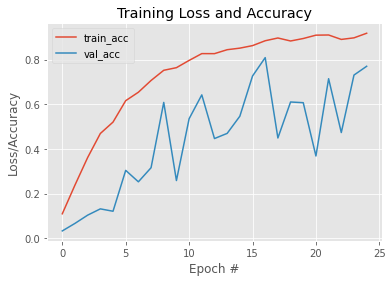

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = AlexNet.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 25
######################################################################################################################################################
aug = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,fill_mode='nearest')
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)
######################################################################################################################################################

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## ResNet50

[INFO] training network...
Epoch 1/25
50/50 [==============================] - 11s 225ms/step - loss: 3.4666 - accuracy: 0.1277 - val_loss: 3.8811 - val_accuracy: 0.0381
Epoch 2/25
50/50 [==============================] - 10s 209ms/step - loss: 1.6274 - accuracy: 0.4723 - val_loss: 7.9870 - val_accuracy: 0.0381
Epoch 3/25
50/50 [==============================] - 11s 213ms/step - loss: 0.8577 - accuracy: 0.7070 - val_loss: 10.9102 - val_accuracy: 0.0381
Epoch 4/25
50/50 [==============================] - 11s 214ms/step - loss: 0.5240 - accuracy: 0.8180 - val_loss: 15.2208 - val_accuracy: 0.0381
Epoch 5/25
50/50 [==============================] - 11s 211ms/step - loss: 0.3159 - accuracy: 0.8888 - val_loss: 16.4643 - val_accuracy: 0.0381
Epoch 6/25
50/50 [==============================] - 10s 208ms/step - loss: 0.2468 - accuracy: 0.9155 - val_loss: 14.9002 - val_accuracy: 0.0531
Epoch 7/25
50/50 [==============================] - 10s 207ms/step - loss: 0.1732 - accuracy: 0.9413 - val_loss

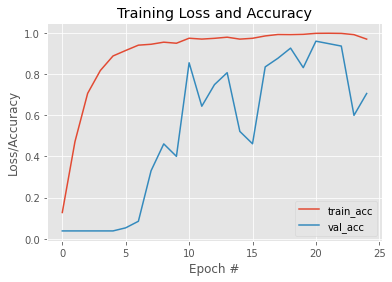

In [ ]:
from tensorflow.keras import backend
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import add
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelBinarizer
from keras.layers import  ZeroPadding2D
from keras.layers import  Add
from keras.initializers import glorot_uniform
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


tf.keras.backend.clear_session()

trainY = to_categorical(trainY, 29)
valY = to_categorical(valY, 29)



model = ResNet50(input_shape = (75, 75, 3), classes = 29)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("[INFO] training network...")
maxIt = 25

######################################################################################################################################################
aug = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,fill_mode='nearest')
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)
######################################################################################################################################################

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

From above we can see that using data augmentation on the network architectures it didnt make much of a difference and the accuracy decreased for some reason when data augmentation was used. 

Network Architecture (without data aug) | Network Architecture (with data aug)
--- | ---
AlexNet, 0.83 | AlexNet, 0.78
VGG16, 0.94 | VGG16, 0.93
VGG19, 0.98 | VGG19, 0.85
ResNet, 0.99 | ResNet, 0.69

# HW-7: Ensemble Learning for different Nets:

## Mini VGG

In [ ]:
from imutils import paths
import cv2
import glob
import h5py
import imutils
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import progressbar
import random
tf.keras.backend.clear_session()

trainY = to_categorical(trainY, 29)

valY = to_categorical(valY, 29)

numberOfModels = 5
epochs = 25
labelNames = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]

for i in range(numberOfModels):
    print('Net', i, 'is being trained...')
    
    # choose the optimizer
    #opt = SGD(lr = 0.01, decay = 0.1 / epochs, momentum = 0.9, nesterov = True)
    opt = Adam()
    
    # compile the model
    model = MiniVGGNet.build(75, 75, 3, 29)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
    # train the model
    aug = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')
    #H = model.fit(aug.flow(trainX, trainY, batch_size = 128), validation_data = (valX, valY), epochs = epochs, steps_per_epoch = len(trainX) // 64, verbose = 1)
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = epochs, verbose = 1)
    
    # save the model
    p = ['/content/drive/MyDrive/ASL/models1', '/content/drive/MyDrive/ASL/models1/model_0.model'.format(i)]
    model.save(os.path.sep.join(p))
    
    # evaluate the network
    predictions = model.predict(valX, batch_size=128)
    report = classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)
    '''
    # save the classification report to file
    p = ['/content/drive/MyDrive/ASL/models1', '/content/drive/MyDrive/ASL/models1/model_0.model'.format(i)]
    f = open(os.path.sep.join(p), "w")
    f.write(report)
    f.close()
    '''
    # plot the training loss and accuracy
    #p = ['output1', 'model_{}.png'.format(i)]
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history['loss'], label = 'train_loss')
    plt.plot(np.arange(0, epochs), H.history['val_loss'], label = 'val_loss')
    plt.plot(np.arange(0, epochs), H.history['accuracy'], label = 'train_acc')
    plt.plot(np.arange(0, epochs), H.history['val_accuracy'], label = 'val_acc')
    
    # add labels and legend
    plt.title('Training Loss and Accuracy for model {}'.format(i))
    plt.xlabel('Epoch #')
    plt.ylabel('Loss/Accuracy')
    plt.legend()
    
    # save graphs
    #plt.savefig(os.path.sep.join(p))
    plt.close()


Net 0 is being trained...
Epoch 1/25
50/50 [==============================] - 2s 49ms/step - loss: 2.8010 - accuracy: 0.2870 - val_loss: 4.6405 - val_accuracy: 0.0381
Epoch 2/25
50/50 [==============================] - 2s 41ms/step - loss: 1.3533 - accuracy: 0.5927 - val_loss: 8.5412 - val_accuracy: 0.0381
Epoch 3/25
50/50 [==============================] - 2s 40ms/step - loss: 0.7739 - accuracy: 0.7650 - val_loss: 7.9966 - val_accuracy: 0.0381
Epoch 4/25
50/50 [==============================] - 2s 41ms/step - loss: 0.4768 - accuracy: 0.8609 - val_loss: 9.6883 - val_accuracy: 0.0381
Epoch 5/25
50/50 [==============================] - 2s 41ms/step - loss: 0.3461 - accuracy: 0.8972 - val_loss: 11.0622 - val_accuracy: 0.0394
Epoch 6/25
50/50 [==============================] - 2s 41ms/step - loss: 0.2243 - accuracy: 0.9380 - val_loss: 10.2469 - val_accuracy: 0.0456
Epoch 7/25
50/50 [==============================] - 2s 41ms/step - loss: 0.1684 - accuracy: 0.9592 - val_loss: 9.7513 - val_ac

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
# construct the path used to collect the models then initialize the
# models list
import glob
modelPaths = os.path.sep.join(['models1', '*.model'])
modelPaths = list(glob.glob(modelPaths))
models = []

# loop over the model paths, loading the model, and adding it to
# the list of models
for (i, modelPath) in enumerate(modelPaths):
	print('Loading model {}/{}'.format(i + 1, len(modelPaths)))
	models.append(load_model(modelPath))

# initialize the list of predictions
print('Evaluating ensemble...')
predictions = []

# loop over the models
for model in models:
	# use the current model to make predictions on the testing data,
	# then store these predictions in the aggregate predictions list
	predictions.append(model.predict(valX, batch_size=64))

# average the probabilities across all model predictions, then show
# a classification report
predictions = np.average(predictions, axis=0)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY,target_names=labelNames))
#print(classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))
'''
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))
'''


Loading model 1/1
Evaluating ensemble...
              precision    recall  f1-score   support

           A       0.82      0.77      0.80        66
           B       0.95      0.86      0.90        80
           C       0.97      0.74      0.84        47
           D       0.85      0.80      0.82        79
           E       0.92      0.60      0.73        82
           F       0.95      0.97      0.96        64
           G       0.92      0.72      0.81        68
           H       0.92      0.78      0.85        60
           I       0.90      0.78      0.84        59
           J       0.95      0.84      0.89        90
           K       0.88      0.69      0.78        65
           L       0.85      0.90      0.88        59
           M       0.42      0.90      0.57        69
           N       0.84      0.60      0.70        70
           O       0.97      0.54      0.69        67
           P       0.46      0.99      0.62        72
           Q       0.90      0.56      0

'\npredictedY = model.predict(valX)\npredictedY = predictedY.argmax(axis=1)\nvalY = valY.argmax(axis=1)\nprint(classification_report(valY, predictedY))\n'

### Snapshot Ensemble:

In [ ]:
tf.keras.backend.clear_session()
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
models = 3
initialLearningRate = 0.2
epochs = 25

trainY = to_categorical(trainY, 29)
valY = to_categorical(valY, 29)

labelNames = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]

# code for a learning rate scheduler
def shiftedCosineLearning(epoch):
    maxEpochs = epochs
    baseLearningRate = initialLearningRate

    alpha = (initialLearningRate/2)*(np.cos(np.pi*np.mod(epoch - 1, np.ceil(epochs/models))/np.ceil(epochs/models)) + 1)
    
    # return the learning rate
    return alpha

callbacks = [LearningRateScheduler(shiftedCosineLearning)]
    
# choose the optimizer
opt = SGD(lr = initialLearningRate)
#pt = Adam()
    
# compile the model
model = MiniVGGNet.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
# train the model
checkpoint = ModelCheckpoint('model{epoch:08d}.model', period=np.ceil(epochs/models)) 
#aug = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')
#H = model.fit(aug.flow(trainX, trainY, batch_size = 64), validation_data = (valX, valY), epochs = epochs,
              #callbacks = callbacks, steps_per_epoch = len(trainX) // 64, verbose = 1)
H = model.fit(trainX, trainY, validation_data = (valX,valY), batch_size = 128, epochs = epochs, verbose = 1)
    
# evaluate the network
predictions = model.predict(valX, batch_size=128)
report = classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)

valY = valY.argmax(axis=1)
trainY = trainY.argmax(axis=1)

Epoch 1/25
63/63 [==============================] - 5s 77ms/step - loss: 3.0717 - accuracy: 0.2540 - val_loss: 10.7703 - val_accuracy: 0.0330
Epoch 2/25
63/63 [==============================] - 4s 69ms/step - loss: 1.5873 - accuracy: 0.5160 - val_loss: 6.0984 - val_accuracy: 0.0795
Epoch 3/25
63/63 [==============================] - 4s 69ms/step - loss: 0.9831 - accuracy: 0.6942 - val_loss: 7.1578 - val_accuracy: 0.0725
Epoch 4/25
63/63 [==============================] - 4s 69ms/step - loss: 0.6819 - accuracy: 0.7861 - val_loss: 3.4587 - val_accuracy: 0.2335
Epoch 5/25
63/63 [==============================] - 4s 70ms/step - loss: 0.4530 - accuracy: 0.8571 - val_loss: 2.1291 - val_accuracy: 0.4410
Epoch 6/25
63/63 [==============================] - 4s 70ms/step - loss: 0.3492 - accuracy: 0.8879 - val_loss: 4.3876 - val_accuracy: 0.2880
Epoch 7/25
63/63 [==============================] - 4s 70ms/step - loss: 0.2732 - accuracy: 0.9141 - val_loss: 2.7470 - val_accuracy: 0.4290
Epoch 8/25
6

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
# construct the path used to collect the models then initialize the
# models list
import glob

trainY = to_categorical(trainY, 29)
valY = to_categorical(valY, 29)

modelPaths = os.path.sep.join(['modelsnapshot', '*.model'])
modelPaths = list(glob.glob(modelPaths))
models = []

# loop over the model paths, loading the model, and adding it to
# the list of models
for (i, modelPath) in enumerate(modelPaths):
	print('Loading model {}/{}'.format(i + 1, len(modelPaths)))
	models.append(load_model(modelPath))

# initialize the list of predictions
print('Evaluating ensemble...')
predictions = []

# loop over the models
for model in models:
	# use the current model to make predictions on the testing data,
	# then store these predictions in the aggregate predictions list
	predictions.append(model.predict(valX, batch_size=64))

# average the probabilities across all model predictions, then show
# a classification report
predictions = np.average(predictions, axis=0)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY,target_names=labelNames))
#print(classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))
'''
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))
'''


Evaluating ensemble...


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


              precision    recall  f1-score   support

           A       0.90      0.91      0.90        66
           B       0.88      0.95      0.92        80
           C       0.98      0.98      0.98        47
           D       0.97      0.94      0.95        79
           E       0.90      0.89      0.90        82
           F       0.97      0.97      0.97        64
           G       0.98      0.84      0.90        68
           H       0.86      1.00      0.92        60
           I       0.94      0.98      0.96        59
           J       1.00      0.99      0.99        90
           K       0.97      0.94      0.95        65
           L       0.98      0.98      0.98        59
           M       0.92      0.97      0.94        69
           N       0.97      0.94      0.96        70
           O       0.96      0.99      0.97        67
           P       0.96      1.00      0.98        72
           Q       1.00      0.97      0.99        68
           R       0.95    

'\npredictedY = model.predict(valX)\npredictedY = predictedY.argmax(axis=1)\nvalY = valY.argmax(axis=1)\nprint(classification_report(valY, predictedY))\n'

## VGG16:

In [ ]:
from imutils import paths
import cv2
import glob
import h5py
import imutils
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import progressbar
import random
tf.keras.backend.clear_session()

trainY = to_categorical(trainY, 29)

valY = to_categorical(valY, 29)

numberOfModels = 3
epochs = 25
labelNames = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]

for i in range(numberOfModels):
    print('Net', i, 'is being trained...')
    
    # choose the optimizer
    #opt = SGD(lr = 0.01, decay = 0.1 / epochs, momentum = 0.9, nesterov = True)
    opt = Adam()
    
    # compile the model
    model = VGGNet16.build(75, 75, 3, 29)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
    # train the model
    aug = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')
    #H = model.fit(aug.flow(trainX, trainY, batch_size = 128), validation_data = (valX, valY), epochs = epochs, steps_per_epoch = len(trainX) // 64, verbose = 1)
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = epochs, verbose = 1)
    
    # save the model
    p = ['/content/drive/MyDrive/ASL/models2', '/content/drive/MyDrive/ASL/models2/model_1.model'.format(i)]
    model.save(os.path.sep.join(p))
    
    # evaluate the network
    predictions = model.predict(valX, batch_size=128)
    report = classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)
    '''
    # save the classification report to file
    p = ['/content/drive/MyDrive/ASL/models1', '/content/drive/MyDrive/ASL/models1/model_0.model'.format(i)]
    f = open(os.path.sep.join(p), "w")
    f.write(report)
    f.close()
    '''
    # plot the training loss and accuracy
    #p = ['output1', 'model_{}.png'.format(i)]
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history['loss'], label = 'train_loss')
    plt.plot(np.arange(0, epochs), H.history['val_loss'], label = 'val_loss')
    plt.plot(np.arange(0, epochs), H.history['accuracy'], label = 'train_acc')
    plt.plot(np.arange(0, epochs), H.history['val_accuracy'], label = 'val_acc')
    
    # add labels and legend
    plt.title('Training Loss and Accuracy for model {}'.format(i))
    plt.xlabel('Epoch #')
    plt.ylabel('Loss/Accuracy')
    plt.legend()
    
    # save graphs
    #plt.savefig(os.path.sep.join(p))
    plt.close()


Net 0 is being trained...
Epoch 1/25
50/50 [==============================] - 8s 157ms/step - loss: 4.0220 - accuracy: 0.0952 - val_loss: 131.5490 - val_accuracy: 0.0375
Epoch 2/25
50/50 [==============================] - 7s 149ms/step - loss: 2.8882 - accuracy: 0.2152 - val_loss: 5.4989 - val_accuracy: 0.0394
Epoch 3/25
50/50 [==============================] - 7s 149ms/step - loss: 2.4157 - accuracy: 0.3114 - val_loss: 4.4249 - val_accuracy: 0.0250
Epoch 4/25
50/50 [==============================] - 7s 148ms/step - loss: 2.0440 - accuracy: 0.4006 - val_loss: 5.7257 - val_accuracy: 0.0369
Epoch 5/25
50/50 [==============================] - 7s 148ms/step - loss: 1.7047 - accuracy: 0.4850 - val_loss: 7.8520 - val_accuracy: 0.0312
Epoch 6/25
50/50 [==============================] - 7s 148ms/step - loss: 1.3990 - accuracy: 0.5742 - val_loss: 18.8329 - val_accuracy: 0.0394
Epoch 7/25
50/50 [==============================] - 7s 148ms/step - loss: 1.1337 - accuracy: 0.6539 - val_loss: 11.5047

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
# construct the path used to collect the models then initialize the
# models list
import glob
modelPaths = os.path.sep.join(['models2', '*.model'])
modelPaths = list(glob.glob(modelPaths))
models = []

# loop over the model paths, loading the model, and adding it to
# the list of models
for (i, modelPath) in enumerate(modelPaths):
	print('Loading model {}/{}'.format(i + 1, len(modelPaths)))
	models.append(load_model(modelPath))

# initialize the list of predictions
print('Evaluating ensemble...')
predictions = []

# loop over the models
for model in models:
	# use the current model to make predictions on the testing data,
	# then store these predictions in the aggregate predictions list
	predictions.append(model.predict(valX, batch_size=64))

# average the probabilities across all model predictions, then show
# a classification report
predictions = np.average(predictions, axis=0)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY,target_names=labelNames))
#print(classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))
'''
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))
'''


Evaluating ensemble...


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


              precision    recall  f1-score   support

           A       0.77      0.86      0.81        66
           B       0.93      0.80      0.86        80
           C       0.90      0.94      0.92        47
           D       0.95      0.97      0.96        79
           E       0.67      0.79      0.73        82
           F       0.97      1.00      0.98        64
           G       0.86      0.81      0.83        68
           H       1.00      0.77      0.87        60
           I       1.00      0.93      0.96        59
           J       0.98      0.99      0.98        90
           K       0.93      0.88      0.90        65
           L       0.87      0.98      0.92        59
           M       0.91      0.87      0.89        69
           N       0.94      0.97      0.96        70
           O       0.86      0.97      0.91        67
           P       0.95      1.00      0.97        72
           Q       0.99      0.99      0.99        68
           R       0.82    

'\npredictedY = model.predict(valX)\npredictedY = predictedY.argmax(axis=1)\nvalY = valY.argmax(axis=1)\nprint(classification_report(valY, predictedY))\n'

### Snapshot Ensemble:

In [ ]:
tf.keras.backend.clear_session()
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
models = 3
initialLearningRate = 0.2
epochs = 25

trainY = to_categorical(trainY, 29)
valY = to_categorical(valY, 29)

labelNames = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]

# code for a learning rate scheduler
def shiftedCosineLearning(epoch):
    maxEpochs = epochs
    baseLearningRate = initialLearningRate

    alpha = (initialLearningRate/2)*(np.cos(np.pi*np.mod(epoch - 1, np.ceil(epochs/models))/np.ceil(epochs/models)) + 1)
    
    # return the learning rate
    return alpha

callbacks = [LearningRateScheduler(shiftedCosineLearning)]
    
# choose the optimizer
opt = SGD(lr = initialLearningRate)
#pt = Adam()
    
# compile the model
model = VGGNet16.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
# train the model
checkpoint = ModelCheckpoint('model{epoch:08d}.model', period=np.ceil(epochs/models)) 
#aug = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')
#H = model.fit(aug.flow(trainX, trainY, batch_size = 64), validation_data = (valX, valY), epochs = epochs,
              #callbacks = callbacks, steps_per_epoch = len(trainX) // 64, verbose = 1)
H = model.fit(trainX, trainY, validation_data = (valX,valY), batch_size = 128, epochs = epochs, verbose = 1)
    
# evaluate the network
predictions = model.predict(valX, batch_size=128)
report = classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)

valY = valY.argmax(axis=1)
trainY = trainY.argmax(axis=1)

Epoch 1/25
63/63 [==============================] - 19s 309ms/step - loss: 5.5780 - accuracy: 0.0654 - val_loss: 31023.1270 - val_accuracy: 0.0320
Epoch 2/25
63/63 [==============================] - 18s 284ms/step - loss: 4.3055 - accuracy: 0.1129 - val_loss: 144.4591 - val_accuracy: 0.0360
Epoch 3/25
63/63 [==============================] - 18s 291ms/step - loss: 3.0375 - accuracy: 0.2093 - val_loss: 14.0263 - val_accuracy: 0.0665
Epoch 4/25
63/63 [==============================] - 19s 299ms/step - loss: 2.6848 - accuracy: 0.2799 - val_loss: 15.0775 - val_accuracy: 0.1325
Epoch 5/25
63/63 [==============================] - 19s 299ms/step - loss: 1.9679 - accuracy: 0.3929 - val_loss: 2.8364 - val_accuracy: 0.2680
Epoch 6/25
63/63 [==============================] - 19s 295ms/step - loss: 1.7931 - accuracy: 0.4441 - val_loss: 1.8670 - val_accuracy: 0.4295
Epoch 7/25
63/63 [==============================] - 19s 295ms/step - loss: 1.4656 - accuracy: 0.5173 - val_loss: 1.9094 - val_accuracy

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
# construct the path used to collect the models then initialize the
# models list
import glob

trainY = to_categorical(trainY, 29)
valY = to_categorical(valY, 29)

modelPaths = os.path.sep.join(['modelsnapshotVGG', '*.model'])
modelPaths = list(glob.glob(modelPaths))
models = []

# loop over the model paths, loading the model, and adding it to
# the list of models
for (i, modelPath) in enumerate(modelPaths):
	print('Loading model {}/{}'.format(i + 1, len(modelPaths)))
	models.append(load_model(modelPath))

# initialize the list of predictions
print('Evaluating ensemble...')
predictions = []

# loop over the models
for model in models:
	# use the current model to make predictions on the testing data,
	# then store these predictions in the aggregate predictions list
	predictions.append(model.predict(valX, batch_size=64))

# average the probabilities across all model predictions, then show
# a classification report
predictions = np.average(predictions, axis=0)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY,target_names=labelNames))
#print(classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))
'''
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))
'''


Evaluating ensemble...


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


              precision    recall  f1-score   support

           A       0.79      0.94      0.86        66
           B       0.90      0.94      0.92        80
           C       0.98      0.96      0.97        47
           D       1.00      0.91      0.95        79
           E       0.99      0.82      0.89        82
           F       1.00      0.98      0.99        64
           G       1.00      0.91      0.95        68
           H       0.97      0.95      0.96        60
           I       0.80      0.93      0.86        59
           J       0.98      0.91      0.94        90
           K       0.77      0.98      0.86        65
           L       1.00      0.90      0.95        59
           M       0.82      0.90      0.86        69
           N       0.91      0.89      0.90        70
           O       0.95      0.93      0.94        67
           P       0.93      0.86      0.89        72
           Q       0.95      0.76      0.85        68
           R       0.52    

'\npredictedY = model.predict(valX)\npredictedY = predictedY.argmax(axis=1)\nvalY = valY.argmax(axis=1)\nprint(classification_report(valY, predictedY))\n'

## AlexNet:

In [ ]:
from imutils import paths
import cv2
import glob
import h5py
import imutils
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import progressbar
import random
tf.keras.backend.clear_session()

trainY = to_categorical(trainY, 29)

valY = to_categorical(valY, 29)

numberOfModels = 3
epochs = 25
labelNames = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]

for i in range(numberOfModels):
    print('Net', i, 'is being trained...')
    
    # choose the optimizer
    #opt = SGD(lr = 0.01, decay = 0.1 / epochs, momentum = 0.9, nesterov = True)
    opt = Adam()
    
    # compile the model
    from tensorflow.keras.regularizers import l2
    model = AlexNet.build(75, 75, 3, 29)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
    # train the model
    aug = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')
    #H = model.fit(aug.flow(trainX, trainY, batch_size = 128), validation_data = (valX, valY), epochs = epochs, steps_per_epoch = len(trainX) // 64, verbose = 1)
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = epochs, verbose = 1)
    
    # save the model
    p = ['/content/drive/MyDrive/ASL/models3', '/content/drive/MyDrive/ASL/models2/model_3.model'.format(i)]
    model.save(os.path.sep.join(p))
    
    # evaluate the network
    predictions = model.predict(valX, batch_size=128)
    report = classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)
    '''
    # save the classification report to file
    p = ['/content/drive/MyDrive/ASL/models1', '/content/drive/MyDrive/ASL/models1/model_0.model'.format(i)]
    f = open(os.path.sep.join(p), "w")
    f.write(report)
    f.close()
    '''
    # plot the training loss and accuracy
    #p = ['output1', 'model_{}.png'.format(i)]
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history['loss'], label = 'train_loss')
    plt.plot(np.arange(0, epochs), H.history['val_loss'], label = 'val_loss')
    plt.plot(np.arange(0, epochs), H.history['accuracy'], label = 'train_acc')
    plt.plot(np.arange(0, epochs), H.history['val_accuracy'], label = 'val_acc')
    
    # add labels and legend
    plt.title('Training Loss and Accuracy for model {}'.format(i))
    plt.xlabel('Epoch #')
    plt.ylabel('Loss/Accuracy')
    plt.legend()
    
    # save graphs
    #plt.savefig(os.path.sep.join(p))
    plt.close()


Net 0 is being trained...
Epoch 1/25
50/50 [==============================] - 2s 30ms/step - loss: 5.9292 - accuracy: 0.1047 - val_loss: 30.7326 - val_accuracy: 0.0294
Epoch 2/25
50/50 [==============================] - 1s 24ms/step - loss: 4.7066 - accuracy: 0.2180 - val_loss: 5.3630 - val_accuracy: 0.1006
Epoch 3/25
50/50 [==============================] - 1s 24ms/step - loss: 3.9392 - accuracy: 0.3336 - val_loss: 6.6325 - val_accuracy: 0.0925
Epoch 4/25
50/50 [==============================] - 1s 25ms/step - loss: 3.4619 - accuracy: 0.4320 - val_loss: 8.9994 - val_accuracy: 0.1081
Epoch 5/25
50/50 [==============================] - 1s 25ms/step - loss: 3.0805 - accuracy: 0.5055 - val_loss: 7.5483 - val_accuracy: 0.1737
Epoch 6/25
50/50 [==============================] - 1s 24ms/step - loss: 2.8168 - accuracy: 0.5734 - val_loss: 7.9366 - val_accuracy: 0.1806
Epoch 7/25
50/50 [==============================] - 1s 24ms/step - loss: 2.5579 - accuracy: 0.6386 - val_loss: 5.0475 - val_acc

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
# construct the path used to collect the models then initialize the
# models list
import glob
modelPaths = os.path.sep.join(['models3', '*.model'])
modelPaths = list(glob.glob(modelPaths))
models = []

# loop over the model paths, loading the model, and adding it to
# the list of models
for (i, modelPath) in enumerate(modelPaths):
	print('Loading model {}/{}'.format(i + 1, len(modelPaths)))
	models.append(load_model(modelPath))

# initialize the list of predictions
print('Evaluating ensemble...')
predictions = []

# loop over the models
for model in models:
	# use the current model to make predictions on the testing data,
	# then store these predictions in the aggregate predictions list
	predictions.append(model.predict(valX, batch_size=64))

# average the probabilities across all model predictions, then show
# a classification report
predictions = np.average(predictions, axis=0)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY,target_names=labelNames))
#print(classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))
'''
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))
'''


Evaluating ensemble...


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


              precision    recall  f1-score   support

           A       0.43      0.92      0.59        66
           B       0.84      0.95      0.89        80
           C       1.00      0.98      0.99        47
           D       0.99      0.86      0.92        79
           E       0.92      0.70      0.79        82
           F       1.00      0.89      0.94        64
           G       0.87      0.91      0.89        68
           H       0.93      0.90      0.92        60
           I       0.94      0.86      0.90        59
           J       1.00      0.87      0.93        90
           K       1.00      0.80      0.89        65
           L       1.00      0.75      0.85        59
           M       0.55      0.58      0.56        69
           N       1.00      0.39      0.56        70
           O       0.94      0.87      0.90        67
           P       0.98      0.90      0.94        72
           Q       0.87      0.88      0.88        68
           R       0.39    

'\npredictedY = model.predict(valX)\npredictedY = predictedY.argmax(axis=1)\nvalY = valY.argmax(axis=1)\nprint(classification_report(valY, predictedY))\n'

### Snapshot Ensemble:

In [ ]:
tf.keras.backend.clear_session()
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
models = 3
initialLearningRate = 0.2
epochs = 25

trainY = to_categorical(trainY, 29)
valY = to_categorical(valY, 29)

labelNames = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]

# code for a learning rate scheduler
def shiftedCosineLearning(epoch):
    maxEpochs = epochs
    baseLearningRate = initialLearningRate

    alpha = (initialLearningRate/2)*(np.cos(np.pi*np.mod(epoch - 1, np.ceil(epochs/models))/np.ceil(epochs/models)) + 1)
    
    # return the learning rate
    return alpha

callbacks = [LearningRateScheduler(shiftedCosineLearning)]
    
# choose the optimizer
opt = SGD(lr = initialLearningRate)
#pt = Adam()
    
# compile the model
model = AlexNet.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
# train the model
checkpoint = ModelCheckpoint('model{epoch:08d}.model', period=np.ceil(epochs/models)) 
#aug = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')
#H = model.fit(aug.flow(trainX, trainY, batch_size = 64), validation_data = (valX, valY), epochs = epochs,
              #callbacks = callbacks, steps_per_epoch = len(trainX) // 64, verbose = 1)
H = model.fit(trainX, trainY, validation_data = (valX,valY), batch_size = 128, epochs = epochs, verbose = 1)
    
# evaluate the network
predictions = model.predict(valX, batch_size=128)
report = classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)

valY = valY.argmax(axis=1)
trainY = trainY.argmax(axis=1)

Epoch 1/25
63/63 [==============================] - 3s 41ms/step - loss: 19.4820 - accuracy: 0.0550 - val_loss: 3022.2517 - val_accuracy: 0.0355
Epoch 2/25
63/63 [==============================] - 2s 32ms/step - loss: 8.4489 - accuracy: 0.0980 - val_loss: 180.8380 - val_accuracy: 0.0340
Epoch 3/25
63/63 [==============================] - 2s 32ms/step - loss: 12.2220 - accuracy: 0.0834 - val_loss: 485.5443 - val_accuracy: 0.0400
Epoch 4/25
63/63 [==============================] - 2s 32ms/step - loss: 8.6629 - accuracy: 0.1343 - val_loss: 16.4137 - val_accuracy: 0.0790
Epoch 5/25
63/63 [==============================] - 2s 32ms/step - loss: 8.7618 - accuracy: 0.1560 - val_loss: 7.2368 - val_accuracy: 0.0570
Epoch 6/25
63/63 [==============================] - 2s 32ms/step - loss: 8.9893 - accuracy: 0.1542 - val_loss: 8.3584 - val_accuracy: 0.1370
Epoch 7/25
63/63 [==============================] - 2s 33ms/step - loss: 7.8103 - accuracy: 0.1950 - val_loss: 5.3514 - val_accuracy: 0.1770
Epo

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
# construct the path used to collect the models then initialize the
# models list
import glob

trainY = to_categorical(trainY, 29)
valY = to_categorical(valY, 29)

modelPaths = os.path.sep.join(['modelsnapshotVGG', '*.model'])
modelPaths = list(glob.glob(modelPaths))
models = []

# loop over the model paths, loading the model, and adding it to
# the list of models
for (i, modelPath) in enumerate(modelPaths):
	print('Loading model {}/{}'.format(i + 1, len(modelPaths)))
	models.append(load_model(modelPath))

# initialize the list of predictions
print('Evaluating ensemble...')
predictions = []

# loop over the models
for model in models:
	# use the current model to make predictions on the testing data,
	# then store these predictions in the aggregate predictions list
	predictions.append(model.predict(valX, batch_size=64))

# average the probabilities across all model predictions, then show
# a classification report
predictions = np.average(predictions, axis=0)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY,target_names=labelNames))
#print(classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))
'''
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))
'''


Evaluating ensemble...


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


              precision    recall  f1-score   support

           A       0.22      0.88      0.35        66
           B       0.61      0.54      0.57        80
           C       0.85      0.36      0.51        47
           D       0.49      0.35      0.41        79
           E       0.60      0.07      0.13        82
           F       0.77      0.58      0.66        64
           G       0.53      0.65      0.58        68
           H       0.44      0.27      0.33        60
           I       0.61      0.61      0.61        59
           J       0.86      0.66      0.74        90
           K       0.84      0.42      0.56        65
           L       0.58      0.24      0.34        59
           M       0.62      0.36      0.46        69
           N       0.46      0.93      0.62        70
           O       0.00      0.00      0.00        67
           P       0.53      0.68      0.60        72
           Q       0.66      0.54      0.60        68
           R       1.00    

'\npredictedY = model.predict(valX)\npredictedY = predictedY.argmax(axis=1)\nvalY = valY.argmax(axis=1)\nprint(classification_report(valY, predictedY))\n'

## VGG19:

In [ ]:
from imutils import paths
import cv2
import glob
import h5py
import imutils
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import progressbar
import random
tf.keras.backend.clear_session()

trainY = to_categorical(trainY, 29)

valY = to_categorical(valY, 29)

numberOfModels = 3
epochs = 25
labelNames = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]

for i in range(numberOfModels):
    print('Net', i, 'is being trained...')
    
    # choose the optimizer
    #opt = SGD(lr = 0.01, decay = 0.1 / epochs, momentum = 0.9, nesterov = True)
    opt = Adam()
    
    # compile the model
    from tensorflow.keras.regularizers import l2
    model = VGGNet19.build(75, 75, 3, 29)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
    # train the model
    aug = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')
    #H = model.fit(aug.flow(trainX, trainY, batch_size = 128), validation_data = (valX, valY), epochs = epochs, steps_per_epoch = len(trainX) // 64, verbose = 1)
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = epochs, verbose = 1)
    
    # save the model
    p = ['/content/drive/MyDrive/ASL/models4', '/content/drive/MyDrive/ASL/models2/model_4.model'.format(i)]
    model.save(os.path.sep.join(p))
    
    # evaluate the network
    predictions = model.predict(valX, batch_size=128)
    report = classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)
    '''
    # save the classification report to file
    p = ['/content/drive/MyDrive/ASL/models1', '/content/drive/MyDrive/ASL/models1/model_0.model'.format(i)]
    f = open(os.path.sep.join(p), "w")
    f.write(report)
    f.close()
    '''
    # plot the training loss and accuracy
    #p = ['output1', 'model_{}.png'.format(i)]
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history['loss'], label = 'train_loss')
    plt.plot(np.arange(0, epochs), H.history['val_loss'], label = 'val_loss')
    plt.plot(np.arange(0, epochs), H.history['accuracy'], label = 'train_acc')
    plt.plot(np.arange(0, epochs), H.history['val_accuracy'], label = 'val_acc')
    
    # add labels and legend
    plt.title('Training Loss and Accuracy for model {}'.format(i))
    plt.xlabel('Epoch #')
    plt.ylabel('Loss/Accuracy')
    plt.legend()
    
    # save graphs
    #plt.savefig(os.path.sep.join(p))
    plt.close()


Net 0 is being trained...
Epoch 1/25
50/50 [==============================] - 9s 185ms/step - loss: 4.0996 - accuracy: 0.0772 - val_loss: 466.3388 - val_accuracy: 0.0281
Epoch 2/25
50/50 [==============================] - 9s 173ms/step - loss: 3.1554 - accuracy: 0.1623 - val_loss: 4.1651 - val_accuracy: 0.0431
Epoch 3/25
50/50 [==============================] - 9s 173ms/step - loss: 2.7162 - accuracy: 0.2364 - val_loss: 9.4974 - val_accuracy: 0.0500
Epoch 4/25
50/50 [==============================] - 9s 173ms/step - loss: 2.2761 - accuracy: 0.3239 - val_loss: 14.8158 - val_accuracy: 0.0437
Epoch 5/25
50/50 [==============================] - 9s 173ms/step - loss: 1.9728 - accuracy: 0.4028 - val_loss: 16.2275 - val_accuracy: 0.0456
Epoch 6/25
50/50 [==============================] - 9s 173ms/step - loss: 1.7110 - accuracy: 0.4809 - val_loss: 9.4661 - val_accuracy: 0.0456
Epoch 7/25
50/50 [==============================] - 9s 173ms/step - loss: 1.4331 - accuracy: 0.5475 - val_loss: 12.558

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
# construct the path used to collect the models then initialize the
# models list
import glob
modelPaths = os.path.sep.join(['models4', '*.model'])
modelPaths = list(glob.glob(modelPaths))
models = []

# loop over the model paths, loading the model, and adding it to
# the list of models
for (i, modelPath) in enumerate(modelPaths):
	print('Loading model {}/{}'.format(i + 1, len(modelPaths)))
	models.append(load_model(modelPath))

# initialize the list of predictions
print('Evaluating ensemble...')
predictions = []

# loop over the models
for model in models:
	# use the current model to make predictions on the testing data,
	# then store these predictions in the aggregate predictions list
	predictions.append(model.predict(valX, batch_size=64))

# average the probabilities across all model predictions, then show
# a classification report
predictions = np.average(predictions, axis=0)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY,target_names=labelNames))
#print(classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))
'''
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))
'''


Evaluating ensemble...


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


              precision    recall  f1-score   support

           A       0.98      0.94      0.96        66
           B       0.99      1.00      0.99        80
           C       1.00      1.00      1.00        47
           D       1.00      1.00      1.00        79
           E       0.99      0.99      0.99        82
           F       1.00      1.00      1.00        64
           G       0.94      0.99      0.96        68
           H       0.97      0.97      0.97        60
           I       0.88      1.00      0.94        59
           J       1.00      0.88      0.93        90
           K       1.00      0.98      0.99        65
           L       1.00      1.00      1.00        59
           M       1.00      0.90      0.95        69
           N       0.96      0.97      0.96        70
           O       0.97      0.97      0.97        67
           P       0.99      1.00      0.99        72
           Q       1.00      0.99      0.99        68
           R       0.92    

'\npredictedY = model.predict(valX)\npredictedY = predictedY.argmax(axis=1)\nvalY = valY.argmax(axis=1)\nprint(classification_report(valY, predictedY))\n'


Network Architecture (without Ensemble) | Network Architecture (with Ensemble)
--- | ---
AlexNet, 0.83 | AlexNet, 0.77
VGG16, 0.94 | VGG16, 0.92
VGG19, 0.98 | VGG19, 0.97
MiniVGG, 0.99 | MiniVGG, 0.74

### Snapshot Ensemble:

In [ ]:
tf.keras.backend.clear_session()
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
models = 3
initialLearningRate = 0.2
epochs = 25

trainY = to_categorical(trainY, 29)
valY = to_categorical(valY, 29)

labelNames = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]

# code for a learning rate scheduler
def shiftedCosineLearning(epoch):
    maxEpochs = epochs
    baseLearningRate = initialLearningRate

    alpha = (initialLearningRate/2)*(np.cos(np.pi*np.mod(epoch - 1, np.ceil(epochs/models))/np.ceil(epochs/models)) + 1)
    
    # return the learning rate
    return alpha

callbacks = [LearningRateScheduler(shiftedCosineLearning)]
    
# choose the optimizer
opt = SGD(lr = initialLearningRate)
#pt = Adam()
    
# compile the model
model = VGGNet19.build(75, 75, 3, 29)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
# train the model
checkpoint = ModelCheckpoint('model{epoch:08d}.model', period=np.ceil(epochs/models)) 
#aug = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')
#H = model.fit(aug.flow(trainX, trainY, batch_size = 64), validation_data = (valX, valY), epochs = epochs,
              #callbacks = callbacks, steps_per_epoch = len(trainX) // 64, verbose = 1)
H = model.fit(trainX, trainY, validation_data = (valX,valY), batch_size = 128, epochs = epochs, verbose = 1)
    
# evaluate the network
predictions = model.predict(valX, batch_size=128)
report = classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)

valY = valY.argmax(axis=1)
trainY = trainY.argmax(axis=1)

Epoch 1/25
63/63 [==============================] - 20s 319ms/step - loss: 5.6428 - accuracy: 0.0525 - val_loss: 511408.5625 - val_accuracy: 0.0355
Epoch 2/25
63/63 [==============================] - 20s 321ms/step - loss: 4.5436 - accuracy: 0.1032 - val_loss: 5811.5415 - val_accuracy: 0.0325
Epoch 3/25
63/63 [==============================] - 20s 324ms/step - loss: 3.9489 - accuracy: 0.1328 - val_loss: 2529.4233 - val_accuracy: 0.0290
Epoch 4/25
63/63 [==============================] - 21s 330ms/step - loss: 3.9159 - accuracy: 0.1497 - val_loss: 286.5982 - val_accuracy: 0.0650
Epoch 5/25
63/63 [==============================] - 21s 333ms/step - loss: 3.6970 - accuracy: 0.1657 - val_loss: 4.8229 - val_accuracy: 0.0505
Epoch 6/25
63/63 [==============================] - 21s 340ms/step - loss: 3.4626 - accuracy: 0.2016 - val_loss: 3.4141 - val_accuracy: 0.1055
Epoch 7/25
63/63 [==============================] - 22s 345ms/step - loss: 2.8242 - accuracy: 0.2447 - val_loss: 4.5824 - val_acc

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
# construct the path used to collect the models then initialize the
# models list
import glob

trainY = to_categorical(trainY, 29)
valY = to_categorical(valY, 29)

modelPaths = os.path.sep.join(['modelsnapshotVGG', '*.model'])
modelPaths = list(glob.glob(modelPaths))
models = []

# loop over the model paths, loading the model, and adding it to
# the list of models
for (i, modelPath) in enumerate(modelPaths):
	print('Loading model {}/{}'.format(i + 1, len(modelPaths)))
	models.append(load_model(modelPath))

# initialize the list of predictions
print('Evaluating ensemble...')
predictions = []

# loop over the models
for model in models:
	# use the current model to make predictions on the testing data,
	# then store these predictions in the aggregate predictions list
	predictions.append(model.predict(valX, batch_size=64))

# average the probabilities across all model predictions, then show
# a classification report
predictions = np.average(predictions, axis=0)
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY,target_names=labelNames))
#print(classification_report(valY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))
'''
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))
'''


Evaluating ensemble...


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


              precision    recall  f1-score   support

           A       0.58      0.53      0.56        66
           B       0.71      0.80      0.75        80
           C       0.97      0.66      0.78        47
           D       0.83      0.67      0.74        79
           E       0.71      0.50      0.59        82
           F       0.50      0.72      0.59        64
           G       0.76      0.75      0.76        68
           H       0.72      0.92      0.81        60
           I       0.65      0.83      0.73        59
           J       0.89      0.79      0.84        90
           K       0.72      0.86      0.78        65
           L       0.72      0.78      0.75        59
           M       0.73      0.65      0.69        69
           N       0.86      0.77      0.81        70
           O       0.45      0.52      0.49        67
           P       0.74      0.85      0.79        72
           Q       0.68      0.88      0.77        68
           R       0.95    

'\npredictedY = model.predict(valX)\npredictedY = predictedY.argmax(axis=1)\nvalY = valY.argmax(axis=1)\nprint(classification_report(valY, predictedY))\n'

# Tuning hyperparameters for final model:

## Dropout:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(drop))
        
        # conv 3
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(drop))
        
        # conv 5
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(drop))
        
        # conv 9
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(drop))
        
        # conv 13
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(drop))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(drop))
        
        # fc 18
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(drop))
        
        # fc 19
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(drop))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

Dropout  0
[INFO] training network...
Epoch 1/20
50/50 [==============================] - 17s 330ms/step - loss: 2.9315 - accuracy: 0.2362 - val_loss: 35.4013 - val_accuracy: 0.0375
Epoch 2/20
50/50 [==============================] - 16s 322ms/step - loss: 1.6126 - accuracy: 0.4817 - val_loss: 5.0946 - val_accuracy: 0.0456
Epoch 3/20
50/50 [==============================] - 16s 327ms/step - loss: 1.1223 - accuracy: 0.6183 - val_loss: 10.4061 - val_accuracy: 0.0325
Epoch 4/20
50/50 [==============================] - 17s 334ms/step - loss: 0.8641 - accuracy: 0.7014 - val_loss: 16.8093 - val_accuracy: 0.0381
Epoch 5/20
50/50 [==============================] - 17s 337ms/step - loss: 0.5709 - accuracy: 0.8059 - val_loss: 20.4507 - val_accuracy: 0.0381
Epoch 6/20
50/50 [==============================] - 17s 331ms/step - loss: 0.5052 - accuracy: 0.8258 - val_loss: 21.2392 - val_accuracy: 0.0381
Epoch 7/20
50/50 [==============================] - 16s 329ms/step - loss: 0.3780 - accuracy: 0.871

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.09      0.17        66
           1       0.12      0.10      0.11        80
           2       0.88      0.60      0.71        47
           3       0.20      0.52      0.29        79
           4       0.00      0.00      0.00        82
           5       0.24      0.39      0.30        64
           6       0.58      0.28      0.38        68
           7       0.45      0.55      0.50        60
           8       0.05      0.07      0.06        59
           9       0.31      0.11      0.16        90
          10       0.30      0.20      0.24        65
          11       0.26      0.14      0.18        59
          12       0.06      0.06      0.06        69
          13       0.12      0.19      0.14        70
          14       0.00      0.00      0.00        67
          15       0.30      0.39      0.34        72
          16       0.23      0.25      0.24        68
          17       0.07    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.29      0.03      0.05        66
           1       0.31      0.06      0.10        80
           2       0.00      0.00      0.00        47
           3       0.18      0.09      0.12        79
           4       1.00      0.01      0.02        82
           5       0.25      0.02      0.03        64
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        90
          10       0.08      0.11      0.09        65
          11       0.25      0.02      0.03        59
          12       0.00      0.00      0.00        69
          13       0.00      0.00      0.00        70
          14       0.00      0.00      0.00        67
          15       0.00      0.00      0.00        72
          16       1.00      0.01      0.03        68
          17       0.07    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        82
           5       0.14      0.03      0.05        64
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        90
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        59
          12       0.00      0.00      0.00        69
          13       0.00      0.00      0.00        70
          14       0.00      0.00      0.00        67
          15       0.00      0.00      0.00        72
          16       0.03      0.96      0.06        68
          17       0.00    

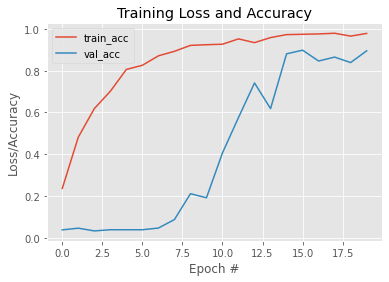

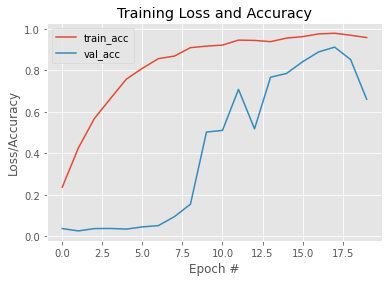

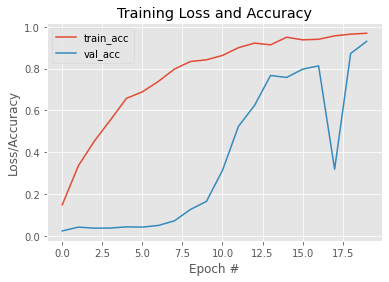

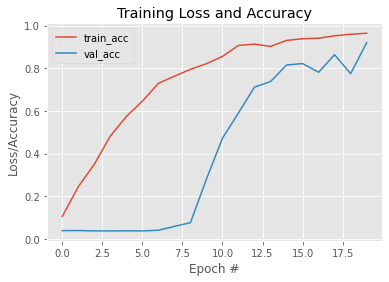

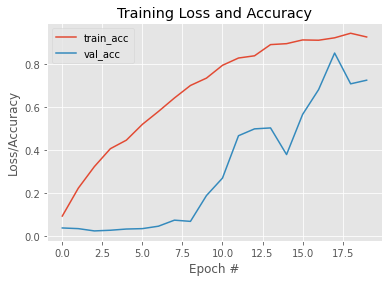

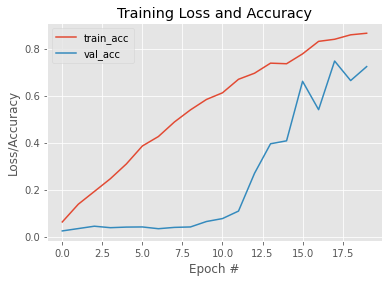

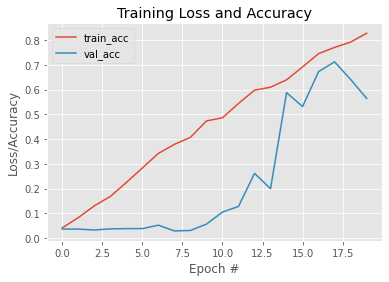

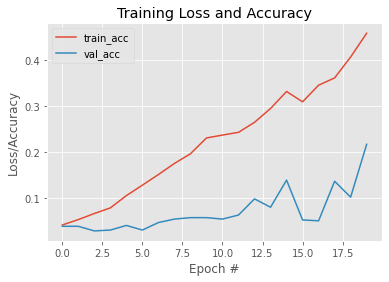

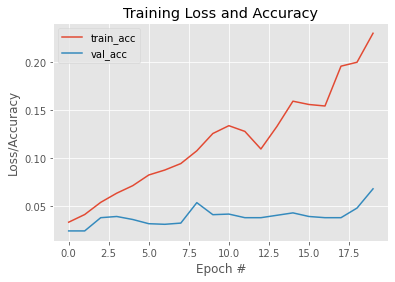

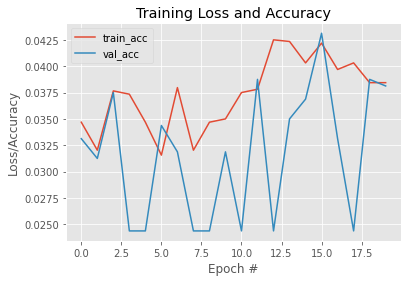

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()



for drop in Drop_out:
    valY = to_categorical(valY, 29)
    

    print('Dropout ', drop)
    from tensorflow.keras.regularizers import l2
    model = VGGNet19.build(75, 75, 3, 29,drop=drop)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print("[INFO] training network...")
    maxIt = 20
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

    print('\n Test accuracy')
    predictedY = model.predict(valX)
    predictedY = predictedY.argmax(axis=1)
    valY = valY.argmax(axis=1)
    print(classification_report(valY, predictedY))

    print(model.summary())

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
    # plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

Taking dropout value 0.2, we move forward with tuning other parameters.

## Kernel Size 1

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        model.add(Conv2D(Filter_size, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(Filter_size, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

Filter size:  4
[INFO] training network...
Epoch 1/20
50/50 [==============================] - 13s 263ms/step - loss: 3.1468 - accuracy: 0.1856 - val_loss: 175.6441 - val_accuracy: 0.0319
Epoch 2/20
50/50 [==============================] - 13s 263ms/step - loss: 1.8273 - accuracy: 0.4352 - val_loss: 4.7045 - val_accuracy: 0.0281
Epoch 3/20
50/50 [==============================] - 13s 269ms/step - loss: 1.2466 - accuracy: 0.5944 - val_loss: 16.5173 - val_accuracy: 0.0381
Epoch 4/20
50/50 [==============================] - 13s 264ms/step - loss: 0.9120 - accuracy: 0.7030 - val_loss: 21.0348 - val_accuracy: 0.0381
Epoch 5/20
50/50 [==============================] - 13s 259ms/step - loss: 0.6714 - accuracy: 0.7753 - val_loss: 19.4418 - val_accuracy: 0.0381
Epoch 6/20
50/50 [==============================] - 13s 257ms/step - loss: 0.4885 - accuracy: 0.8353 - val_loss: 18.4278 - val_accuracy: 0.0381
Epoch 7/20
50/50 [==============================] - 13s 256ms/step - loss: 0.3534 - accuracy:

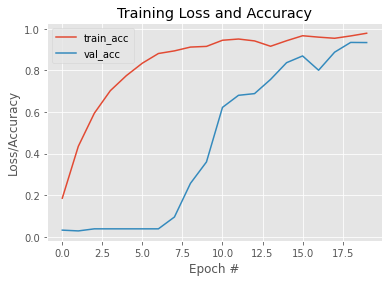

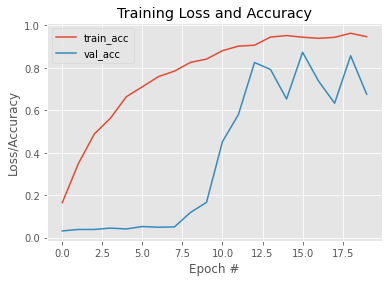

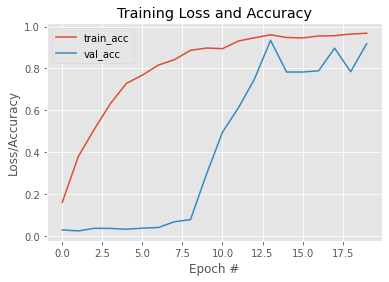

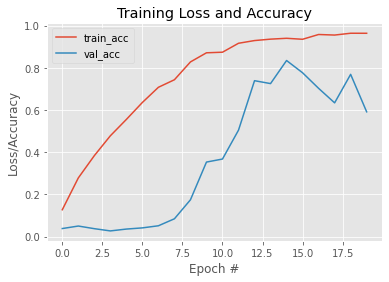

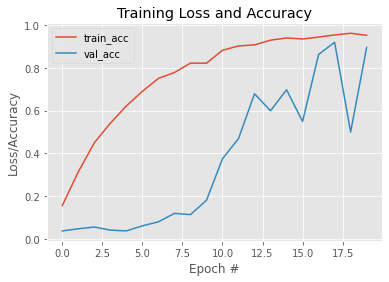

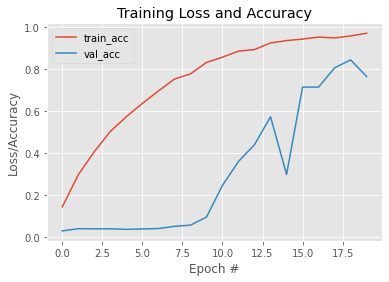

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()


for filtersize in Filter_size:
    valY = to_categorical(valY, 29)

    print('Filter size: ', filtersize)
    from tensorflow.keras.regularizers import l2
    model = VGGNet19.build(75, 75, 3, 29,0.2,filtersize)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print("[INFO] training network...")
    maxIt = 20
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

    print('\n Test accuracy')
    predictedY = model.predict(valX)
    predictedY = predictedY.argmax(axis=1)
    valY = valY.argmax(axis=1)
    print(classification_report(valY, predictedY))

    print(model.summary())

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
    # plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

Taking size 32, we move forward.

## Kernel Size 2:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(Filter_size2, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(Filter_size2, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

Filter size:  4
[INFO] training network...
Epoch 1/20
50/50 [==============================] - 12s 239ms/step - loss: 3.3072 - accuracy: 0.1648 - val_loss: 9.7150 - val_accuracy: 0.0244
Epoch 2/20
50/50 [==============================] - 12s 242ms/step - loss: 2.3036 - accuracy: 0.3137 - val_loss: 4.0891 - val_accuracy: 0.0356
Epoch 3/20
50/50 [==============================] - 12s 249ms/step - loss: 1.8450 - accuracy: 0.4264 - val_loss: 11.9699 - val_accuracy: 0.0381
Epoch 4/20
50/50 [==============================] - 12s 247ms/step - loss: 1.5050 - accuracy: 0.5275 - val_loss: 14.6698 - val_accuracy: 0.0381
Epoch 5/20
50/50 [==============================] - 12s 240ms/step - loss: 1.2143 - accuracy: 0.6217 - val_loss: 15.1519 - val_accuracy: 0.0469
Epoch 6/20
50/50 [==============================] - 12s 238ms/step - loss: 0.9623 - accuracy: 0.6825 - val_loss: 13.0346 - val_accuracy: 0.0494
Epoch 7/20
50/50 [==============================] - 12s 238ms/step - loss: 0.7255 - accuracy: 0

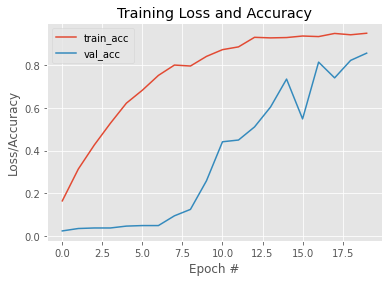

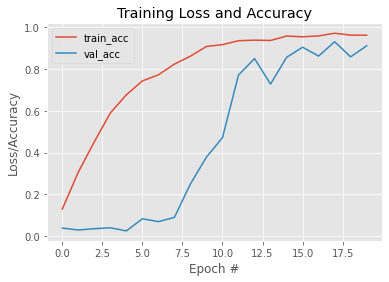

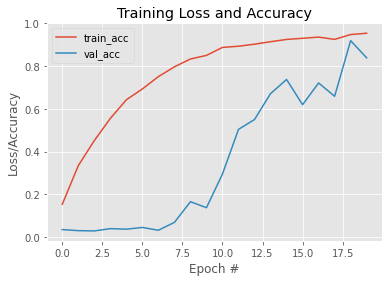

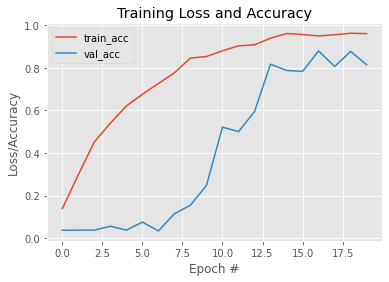

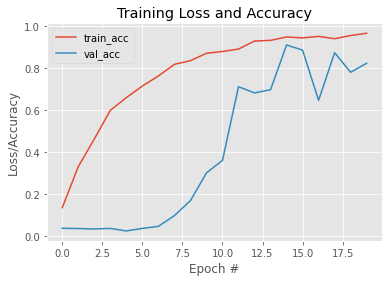

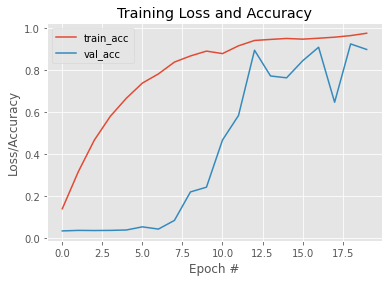

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()


for filtersize2 in Filter_size2:
    valY = to_categorical(valY, 29)

    print('Filter size: ', filtersize2)
    from tensorflow.keras.regularizers import l2
    model = VGGNet19.build(75, 75, 3, 29,0.2,32,filtersize2)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print("[INFO] training network...")
    maxIt = 20
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

    print('\n Test accuracy')
    predictedY = model.predict(valX)
    predictedY = predictedY.argmax(axis=1)
    valY = valY.argmax(axis=1)
    print(classification_report(valY, predictedY))

    print(model.summary())

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
    # plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

Taking 16 as the size and moving forward:

## Kernel Size 3:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(Filter_size3, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(Filter_size3, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(Filter_size3, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(Filter_size3, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

Filter size:  4
[INFO] training network...
Epoch 1/20
50/50 [==============================] - 8s 163ms/step - loss: 3.7867 - accuracy: 0.0878 - val_loss: 7.2825 - val_accuracy: 0.0269
Epoch 2/20
50/50 [==============================] - 8s 152ms/step - loss: 2.9331 - accuracy: 0.1645 - val_loss: 5.0665 - val_accuracy: 0.0338
Epoch 3/20
50/50 [==============================] - 8s 153ms/step - loss: 2.4590 - accuracy: 0.2603 - val_loss: 7.5512 - val_accuracy: 0.0375
Epoch 4/20
50/50 [==============================] - 8s 155ms/step - loss: 1.9943 - accuracy: 0.3761 - val_loss: 5.8348 - val_accuracy: 0.0344
Epoch 5/20
50/50 [==============================] - 8s 156ms/step - loss: 1.7993 - accuracy: 0.4416 - val_loss: 7.2020 - val_accuracy: 0.0444
Epoch 6/20
50/50 [==============================] - 8s 158ms/step - loss: 1.4532 - accuracy: 0.5347 - val_loss: 10.2326 - val_accuracy: 0.0463
Epoch 7/20
50/50 [==============================] - 8s 160ms/step - loss: 1.2237 - accuracy: 0.5983 - va

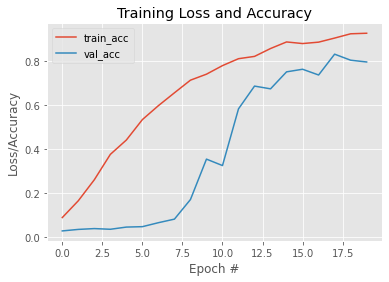

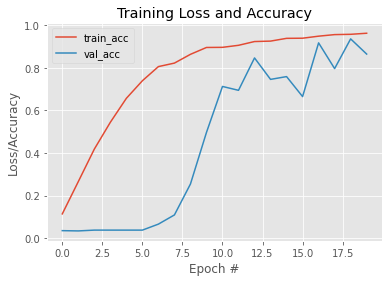

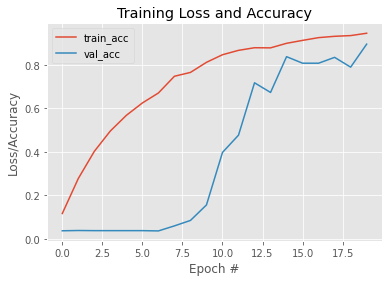

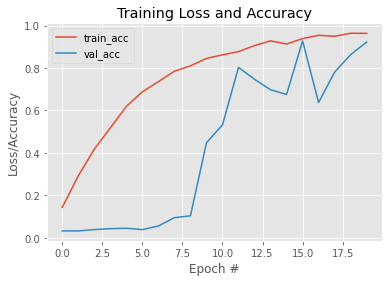

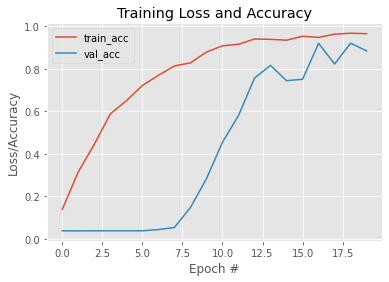

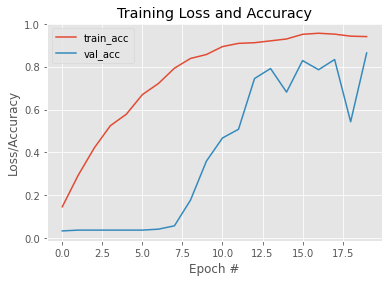

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()


for filtersize3 in Filter_size3:
    valY = to_categorical(valY, 29)

    print('Filter size: ', filtersize3)
    from tensorflow.keras.regularizers import l2
    model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,filtersize3)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print("[INFO] training network...")
    maxIt = 20
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

    print('\n Test accuracy')
    predictedY = model.predict(valX)
    predictedY = predictedY.argmax(axis=1)
    valY = valY.argmax(axis=1)
    print(classification_report(valY, predictedY))

    print(model.summary())

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
    # plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

taking 64 as the right size and moving forward.

## Kernel Size 4

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        model.add(Conv2D(32, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(Filter_size4, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(Filter_size4, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(Filter_size4, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(Filter_size4, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(Filter_size4, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(Filter_size4, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(Filter_size4, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(Filter_size4, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

Filter size:  4
[INFO] training network...
Epoch 1/20
50/50 [==============================] - 4s 80ms/step - loss: 4.1418 - accuracy: 0.0441 - val_loss: 3.4866 - val_accuracy: 0.0400
Epoch 2/20
50/50 [==============================] - 4s 72ms/step - loss: 3.5784 - accuracy: 0.0528 - val_loss: 3.5338 - val_accuracy: 0.0356
Epoch 3/20
50/50 [==============================] - 4s 72ms/step - loss: 3.3868 - accuracy: 0.0711 - val_loss: 3.4403 - val_accuracy: 0.0419
Epoch 4/20
50/50 [==============================] - 4s 73ms/step - loss: 3.2676 - accuracy: 0.0842 - val_loss: 3.8210 - val_accuracy: 0.0362
Epoch 5/20
50/50 [==============================] - 4s 73ms/step - loss: 3.1886 - accuracy: 0.0939 - val_loss: 4.2418 - val_accuracy: 0.0281
Epoch 6/20
50/50 [==============================] - 4s 73ms/step - loss: 3.0845 - accuracy: 0.1052 - val_loss: 3.7969 - val_accuracy: 0.0350
Epoch 7/20
50/50 [==============================] - 4s 72ms/step - loss: 2.9634 - accuracy: 0.1167 - val_loss: 

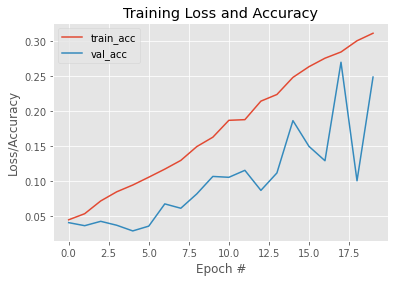

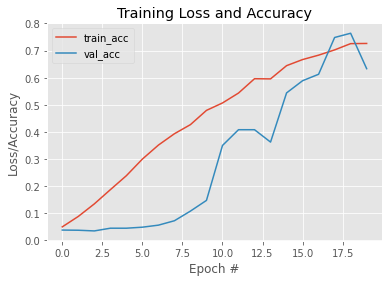

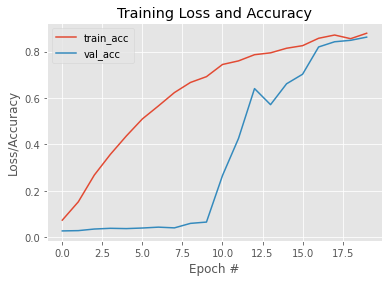

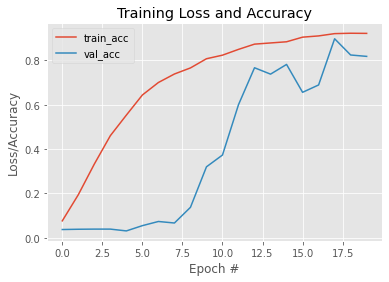

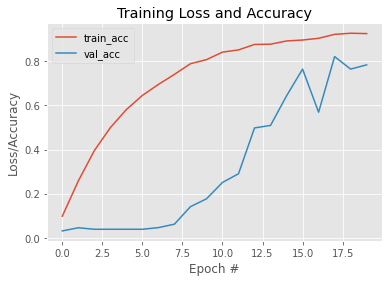

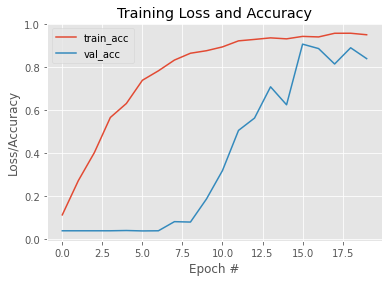

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()


for filtersize4 in Filter_size4:
    valY = to_categorical(valY, 29)

    print('Filter size: ', filtersize4)
    from tensorflow.keras.regularizers import l2
    model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,filtersize4)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print("[INFO] training network...")
    maxIt = 20
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

    print('\n Test accuracy')
    predictedY = model.predict(valX)
    predictedY = predictedY.argmax(axis=1)
    valY = valY.argmax(axis=1)
    print(classification_report(valY, predictedY))

    print(model.summary())

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
    # plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

Taking 32 as the size and moving forward.

## Layer sizes:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        model.add(Conv2D(32, Layer_Size, padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32, Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,Layer_Size, padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

Layer size :  (1, 1)
[INFO] training network...
Epoch 1/20
50/50 [==============================] - 3s 63ms/step - loss: 4.3692 - accuracy: 0.0417 - val_loss: 3.4713 - val_accuracy: 0.0331
Epoch 2/20
50/50 [==============================] - 3s 54ms/step - loss: 3.5710 - accuracy: 0.0661 - val_loss: 3.6716 - val_accuracy: 0.0375
Epoch 3/20
50/50 [==============================] - 3s 55ms/step - loss: 3.3044 - accuracy: 0.0925 - val_loss: 3.9729 - val_accuracy: 0.0375
Epoch 4/20
50/50 [==============================] - 3s 55ms/step - loss: 3.0306 - accuracy: 0.1273 - val_loss: 4.2787 - val_accuracy: 0.0381
Epoch 5/20
50/50 [==============================] - 3s 55ms/step - loss: 2.8264 - accuracy: 0.1714 - val_loss: 7.3264 - val_accuracy: 0.0381
Epoch 6/20
50/50 [==============================] - 3s 55ms/step - loss: 2.6378 - accuracy: 0.2008 - val_loss: 9.6305 - val_accuracy: 0.0381
Epoch 7/20
50/50 [==============================] - 3s 55ms/step - loss: 2.4908 - accuracy: 0.2375 - val_l

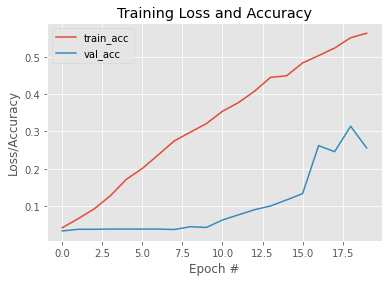

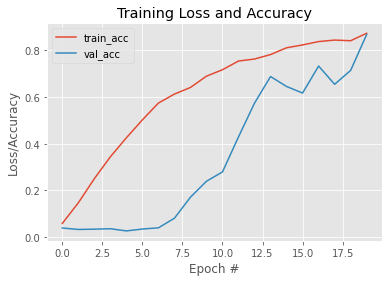

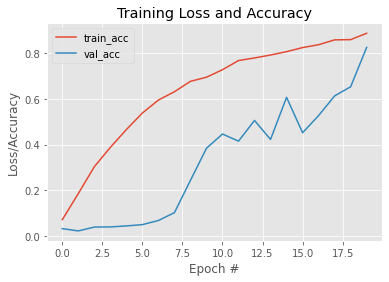

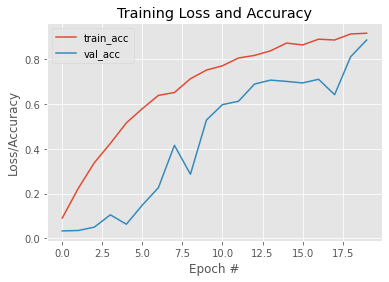

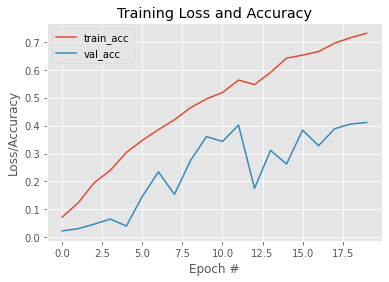

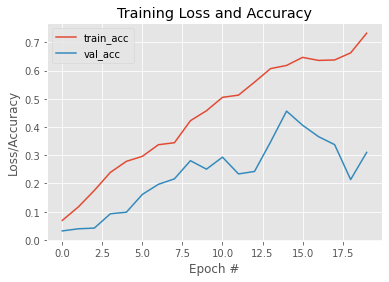

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()


for laysize in Layer_Size:
    valY = to_categorical(valY, 29)

    print('Layer size : ', laysize)
    from tensorflow.keras.regularizers import l2
    model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,laysize)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print("[INFO] training network...")
    maxIt = 20
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

    print('\n Test accuracy')
    predictedY = model.predict(valX)
    predictedY = predictedY.argmax(axis=1)
    valY = valY.argmax(axis=1)
    print(classification_report(valY, predictedY))

    print(model.summary())

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
    # plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

taking (3,3) layer size and moving forward.

## Regularization Methods:

kernel_regularizer: Regularizer function applied to the kernel weights matrix (see regularizer).

activity_regularizer: Regularizer function applied to the output of the layer (its "activation"). (see regularizer).

### Activity_regularizer method:

#### L1:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

L1:  0.1
[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 104ms/step - loss: 10895.6387 - accuracy: 0.0345 - val_loss: 2508.5225 - val_accuracy: 0.0306
Epoch 2/20
50/50 [==============================] - 5s 92ms/step - loss: 5424.0405 - accuracy: 0.0370 - val_loss: 2073.3821 - val_accuracy: 0.0400
Epoch 3/20
50/50 [==============================] - 5s 92ms/step - loss: 4177.3721 - accuracy: 0.0383 - val_loss: 1482.6100 - val_accuracy: 0.0338
Epoch 4/20
50/50 [==============================] - 5s 92ms/step - loss: 3877.9897 - accuracy: 0.0367 - val_loss: 1531.3539 - val_accuracy: 0.0356
Epoch 5/20
50/50 [==============================] - 5s 92ms/step - loss: 2791.8408 - accuracy: 0.0391 - val_loss: 1293.4780 - val_accuracy: 0.0319
Epoch 6/20
50/50 [==============================] - 5s 92ms/step - loss: 2230.1213 - accuracy: 0.0336 - val_loss: 1099.0273 - val_accuracy: 0.0356
Epoch 7/20
50/50 [==============================] - 5s 93ms/step - loss: 2506.97

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00        80
           2       0.02      1.00      0.05        47
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        90
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        59
          12       0.00      0.00      0.00        69
          13       0.00      0.00      0.00        70
          14       0.00      0.00      0.00        67
          15       0.00      0.00      0.00        72
          16       0.00      0.00      0.00        68
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        90
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        59
          12       0.00      0.00      0.00        69
          13       0.00      0.00      0.00        70
          14       0.00      0.00      0.00        67
          15       0.00      0.00      0.00        72
          16       0.03      1.00      0.07        68
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        90
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        59
          12       0.00      0.00      0.00        69
          13       0.00      0.00      0.00        70
          14       0.00      0.00      0.00        67
          15       0.00      0.00      0.00        72
          16       0.03      1.00      0.07        68
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.44      0.21      0.29        66
           1       0.90      0.33      0.48        80
           2       1.00      0.13      0.23        47
           3       1.00      0.01      0.02        79
           4       1.00      0.01      0.02        82
           5       0.91      0.47      0.62        64
           6       0.59      0.34      0.43        68
           7       0.00      0.00      0.00        60
           8       0.35      0.54      0.43        59
           9       0.63      0.13      0.22        90
          10       0.39      0.71      0.51        65
          11       0.49      0.49      0.49        59
          12       0.27      0.12      0.16        69
          13       0.12      0.73      0.21        70
          14       0.10      0.03      0.05        67
          15       0.90      0.12      0.22        72
          16       0.73      0.32      0.45        68
          17       0.53    

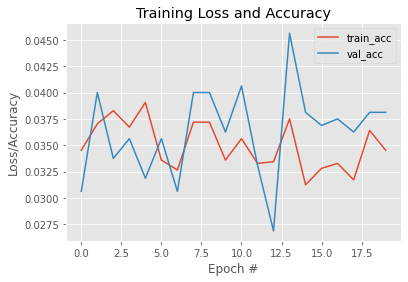

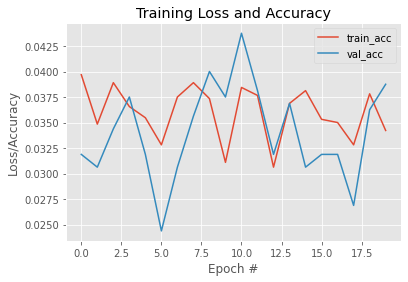

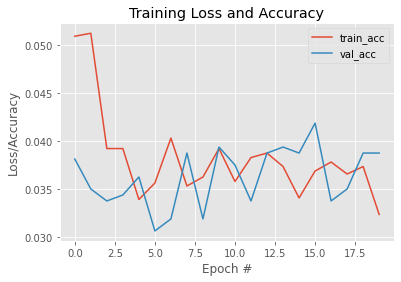

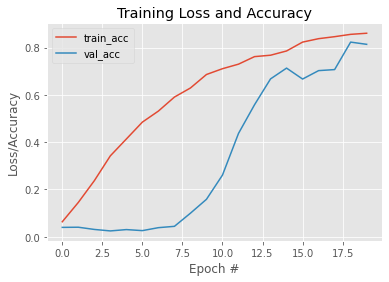

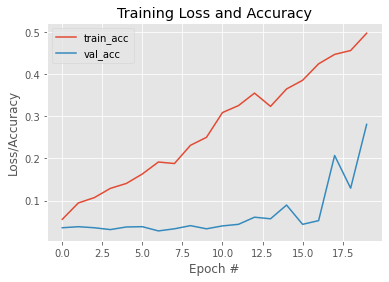

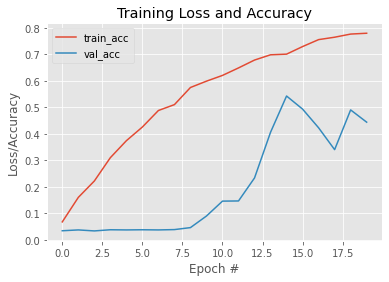

In [ ]:
trainY = to_categorical(trainY, 29)
from tensorflow.keras.regularizers import l1
tf.keras.backend.clear_session()


for Lamb1 in L1:
    valY = to_categorical(valY, 29)

    print('L1: ', Lamb1)
    from tensorflow.keras.regularizers import l2
    model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),Lamb1)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print("[INFO] training network...")
    maxIt = 20
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

    print('\n Test accuracy')
    predictedY = model.predict(valX)
    predictedY = predictedY.argmax(axis=1)
    valY = valY.argmax(axis=1)
    print(classification_report(valY, predictedY))

    print(model.summary())

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
    # plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

Taking L1=0 and moving forward.

#### L2:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l2(L2)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l2(L2)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

L2:  0.1
[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 105ms/step - loss: 9547.7734 - accuracy: 0.0327 - val_loss: 502.6127 - val_accuracy: 0.0312
Epoch 2/20
50/50 [==============================] - 5s 93ms/step - loss: 3493.5894 - accuracy: 0.0344 - val_loss: 368.3759 - val_accuracy: 0.0344
Epoch 3/20
50/50 [==============================] - 5s 93ms/step - loss: 2254.0950 - accuracy: 0.0380 - val_loss: 355.3182 - val_accuracy: 0.0312
Epoch 4/20
50/50 [==============================] - 5s 93ms/step - loss: 2090.5198 - accuracy: 0.0355 - val_loss: 389.4986 - val_accuracy: 0.0331
Epoch 5/20
50/50 [==============================] - 5s 93ms/step - loss: 1796.7390 - accuracy: 0.0322 - val_loss: 423.2864 - val_accuracy: 0.0344
Epoch 6/20
50/50 [==============================] - 5s 93ms/step - loss: 1744.2889 - accuracy: 0.0352 - val_loss: 278.8899 - val_accuracy: 0.0331
Epoch 7/20
50/50 [==============================] - 5s 93ms/step - loss: 1844.7798 - ac

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        90
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        59
          12       0.00      0.00      0.00        69
          13       0.00      0.00      0.00        70
          14       0.00      0.00      0.00        67
          15       0.00      0.00      0.00        72
          16       0.03      1.00      0.07        68
          17       0.02    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        90
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        59
          12       0.00      0.00      0.00        69
          13       0.00      0.00      0.00        70
          14       0.03      1.00      0.06        67
          15       0.00      0.00      0.00        72
          16       0.00      0.00      0.00        68
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.04      1.00      0.08        80
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        90
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        59
          12       0.00      0.00      0.00        69
          13       0.00      0.00      0.00        70
          14       0.00      0.00      0.00        67
          15       0.00      0.00      0.00        72
          16       0.00      0.00      0.00        68
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        90
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        59
          12       0.04      0.55      0.07        69
          13       0.11      0.03      0.04        70
          14       0.00      0.00      0.00        67
          15       0.10      0.29      0.15        72
          16       0.07      0.37      0.12        68
          17       0.00    

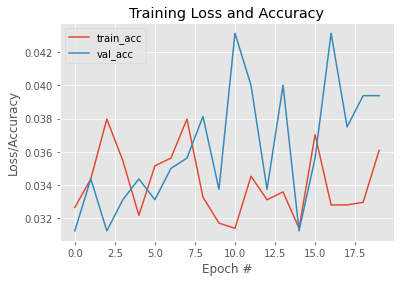

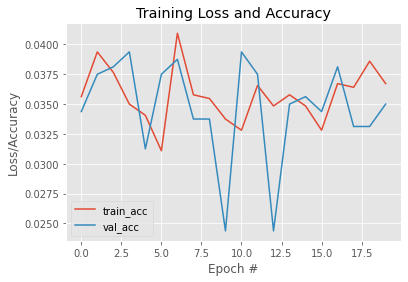

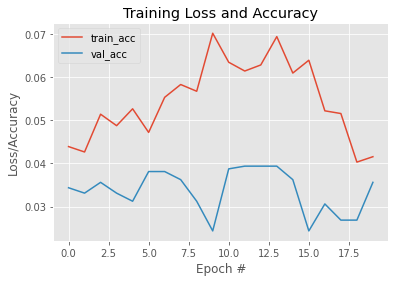

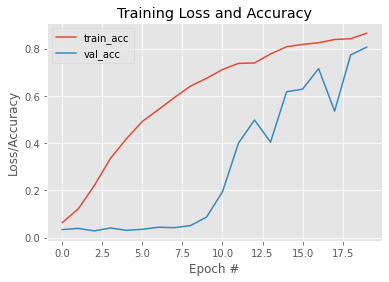

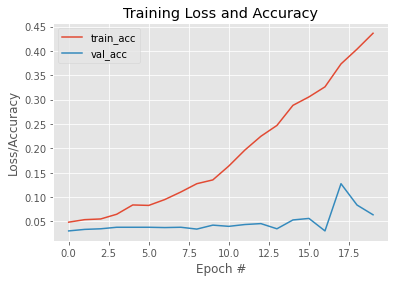

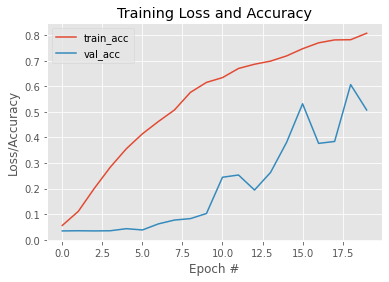

In [ ]:
trainY = to_categorical(trainY, 29)
from tensorflow.keras.regularizers import l1
tf.keras.backend.clear_session()


for Lamb2 in L_2:
    valY = to_categorical(valY, 29)

    print('L2: ', Lamb2)
    from tensorflow.keras.regularizers import l2
    model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,Lamb2)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print("[INFO] training network...")
    maxIt = 20
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

    print('\n Test accuracy')
    predictedY = model.predict(valX)
    predictedY = predictedY.argmax(axis=1)
    valY = valY.argmax(axis=1)
    print(classification_report(valY, predictedY))

    print(model.summary())

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
    # plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

Taking L2 value = 0.

### Kernel_regularizer method:

#### L1:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',kernel_regularizer = l1(L1)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,kernel_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,kernel_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

L1:  0.1
[INFO] training network...
Epoch 1/20
50/50 [==============================] - 6s 115ms/step - loss: 8262.1846 - accuracy: 0.0436 - val_loss: 1166.1566 - val_accuracy: 0.0375
Epoch 2/20
50/50 [==============================] - 5s 104ms/step - loss: 665.6029 - accuracy: 0.0384 - val_loss: 413.6566 - val_accuracy: 0.0388
Epoch 3/20
50/50 [==============================] - 5s 104ms/step - loss: 351.7883 - accuracy: 0.0392 - val_loss: 318.3544 - val_accuracy: 0.0388
Epoch 4/20
50/50 [==============================] - 5s 105ms/step - loss: 306.1344 - accuracy: 0.0392 - val_loss: 295.9814 - val_accuracy: 0.0388
Epoch 5/20
50/50 [==============================] - 5s 104ms/step - loss: 289.8260 - accuracy: 0.0392 - val_loss: 282.8076 - val_accuracy: 0.0388
Epoch 6/20
50/50 [==============================] - 5s 104ms/step - loss: 280.4802 - accuracy: 0.0392 - val_loss: 277.4791 - val_accuracy: 0.0388
Epoch 7/20
50/50 [==============================] - 5s 105ms/step - loss: 275.3697 - a

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        90
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        59
          12       0.00      0.00      0.00        69
          13       0.00      0.00      0.00        70
          14       0.00      0.00      0.00        67
          15       0.00      0.00      0.00        72
          16       0.03      1.00      0.07        68
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00        80
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        64
           6       0.00      0.00      0.00        68
           7       0.03      1.00      0.06        60
           8       0.00      0.00      0.00        59
           9       0.00      0.00      0.00        90
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        59
          12       0.00      0.00      0.00        69
          13       0.00      0.00      0.00        70
          14       0.00      0.00      0.00        67
          15       0.00      0.00      0.00        72
          16       0.00      0.00      0.00        68
          17       0.00    

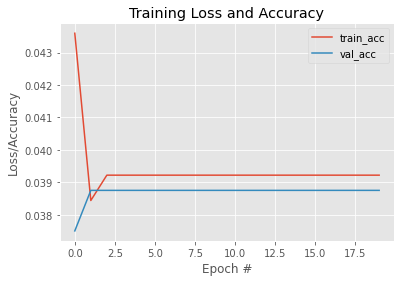

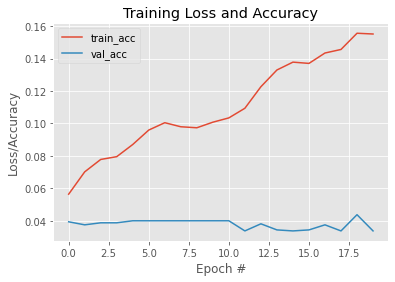

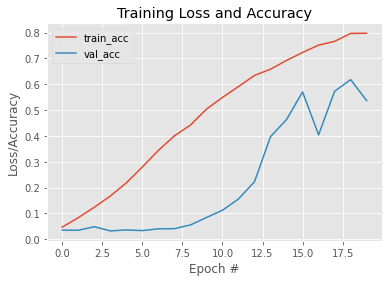

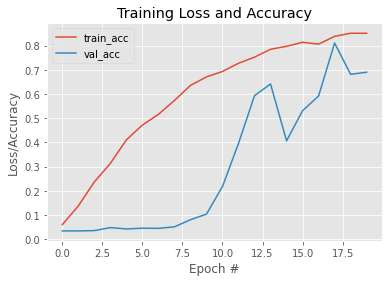

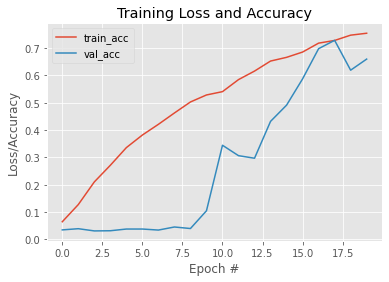

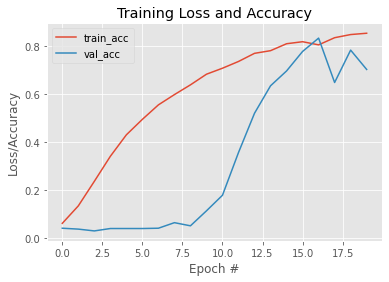

In [ ]:
trainY = to_categorical(trainY, 29)
from tensorflow.keras.regularizers import l1
tf.keras.backend.clear_session()


for Lamb1 in L1:
    valY = to_categorical(valY, 29)

    print('L1: ', Lamb1)
    from tensorflow.keras.regularizers import l2
    model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),Lamb1)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print("[INFO] training network...")
    maxIt = 20
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

    print('\n Test accuracy')
    predictedY = model.predict(valX)
    predictedY = predictedY.argmax(axis=1)
    valY = valY.argmax(axis=1)
    print(classification_report(valY, predictedY))

    print(model.summary())

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
    # plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

taking L1 = 1 e-5 and moving forward.

#### L2:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',kernel_regularizer = l2(L2)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,kernel_regularizer = l2(L2)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,kernel_regularizer = l2(L2)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

L2:  0.1
[INFO] training network...
Epoch 1/20
50/50 [==============================] - 6s 115ms/step - loss: 205.1210 - accuracy: 0.0572 - val_loss: 61.5151 - val_accuracy: 0.0388
Epoch 2/20
50/50 [==============================] - 5s 105ms/step - loss: 50.3501 - accuracy: 0.1248 - val_loss: 42.4565 - val_accuracy: 0.0381
Epoch 3/20
50/50 [==============================] - 5s 106ms/step - loss: 36.3654 - accuracy: 0.1641 - val_loss: 31.9093 - val_accuracy: 0.0306
Epoch 4/20
50/50 [==============================] - 5s 106ms/step - loss: 27.0165 - accuracy: 0.2220 - val_loss: 24.2509 - val_accuracy: 0.0400
Epoch 5/20
50/50 [==============================] - 5s 107ms/step - loss: 20.2224 - accuracy: 0.3033 - val_loss: 18.9990 - val_accuracy: 0.0281
Epoch 6/20
50/50 [==============================] - 5s 105ms/step - loss: 15.5003 - accuracy: 0.3517 - val_loss: 15.3481 - val_accuracy: 0.0312
Epoch 7/20
50/50 [==============================] - 5s 107ms/step - loss: 12.2443 - accuracy: 0.385

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.87      0.20      0.32        66
           1       0.96      0.68      0.79        80
           2       0.95      0.83      0.89        47
           3       1.00      0.18      0.30        79
           4       0.93      0.33      0.49        82
           5       0.96      0.39      0.56        64
           6       0.96      0.63      0.76        68
           7       0.73      0.68      0.71        60
           8       0.91      0.71      0.80        59
           9       0.77      0.80      0.79        90
          10       0.00      0.00      0.00        65
          11       0.41      0.81      0.55        59
          12       0.09      0.04      0.06        69
          13       0.43      0.86      0.58        70
          14       0.03      0.03      0.03        67
          15       0.67      0.99      0.80        72
          16       1.00      0.07      0.14        68
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.63      0.33      0.44        66
           1       1.00      0.38      0.55        80
           2       0.84      0.79      0.81        47
           3       0.68      0.82      0.75        79
           4       0.46      0.20      0.27        82
           5       1.00      0.62      0.77        64
           6       0.92      0.66      0.77        68
           7       1.00      0.42      0.59        60
           8       0.68      0.58      0.62        59
           9       0.79      0.26      0.39        90
          10       0.91      0.31      0.46        65
          11       0.70      0.95      0.81        59
          12       0.67      0.06      0.11        69
          13       0.52      0.61      0.56        70
          14       0.68      0.73      0.71        67
          15       0.43      0.93      0.59        72
          16       0.85      0.82      0.84        68
          17       0.00    

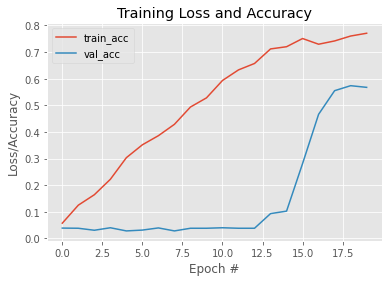

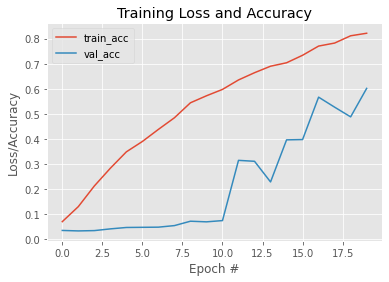

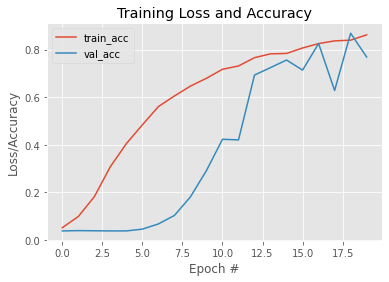

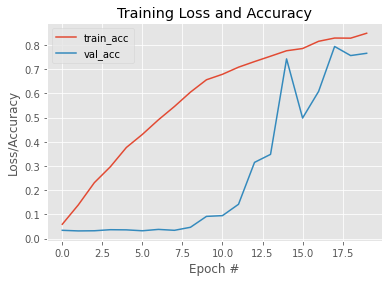

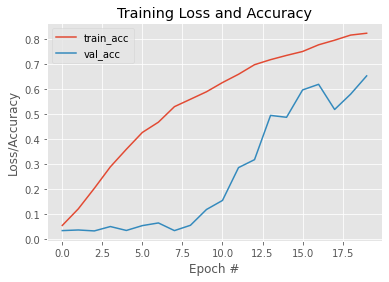

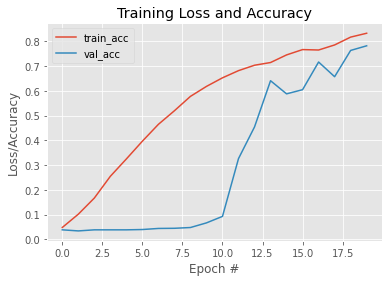

In [ ]:
trainY = to_categorical(trainY, 29)
from tensorflow.keras.regularizers import l1
tf.keras.backend.clear_session()


for Lamb2 in L2:
    valY = to_categorical(valY, 29)

    print('L2: ', Lamb2)
    from tensorflow.keras.regularizers import l2
    model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),1e-5,Lamb2)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print("[INFO] training network...")
    maxIt = 20
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

    print('\n Test accuracy')
    predictedY = model.predict(valX)
    predictedY = predictedY.argmax(axis=1)
    valY = valY.argmax(axis=1)
    print(classification_report(valY, predictedY))

    print(model.summary())

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
    # plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

L2 value obtained is 1e-5. Now moving forward.

Activity Regularizer gave better accuracy values for L1 and L2.

## Pool Size:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (poolsize), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (poolsize), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (poolsize), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (poolsize), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (poolsize), strides = (2, 2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

Pool Size : (1, 1)
[INFO] training network...
Epoch 1/20
50/50 [==============================] - 7s 141ms/step - loss: 4.5690 - accuracy: 0.0373 - val_loss: 3.4348 - val_accuracy: 0.0375
Epoch 2/20
50/50 [==============================] - 6s 128ms/step - loss: 3.5285 - accuracy: 0.0614 - val_loss: 3.4616 - val_accuracy: 0.0338
Epoch 3/20
50/50 [==============================] - 6s 127ms/step - loss: 3.1155 - accuracy: 0.1103 - val_loss: 3.5124 - val_accuracy: 0.0356
Epoch 4/20
50/50 [==============================] - 6s 128ms/step - loss: 2.7354 - accuracy: 0.1756 - val_loss: 3.8182 - val_accuracy: 0.0356
Epoch 5/20
50/50 [==============================] - 6s 128ms/step - loss: 2.3806 - accuracy: 0.2625 - val_loss: 4.5013 - val_accuracy: 0.0344
Epoch 6/20
50/50 [==============================] - 6s 128ms/step - loss: 2.0957 - accuracy: 0.3316 - val_loss: 5.0897 - val_accuracy: 0.0437
Epoch 7/20
50/50 [==============================] - 6s 127ms/step - loss: 1.8237 - accuracy: 0.4116 - 

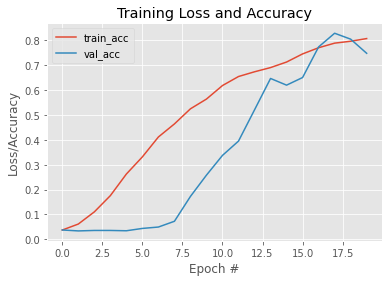

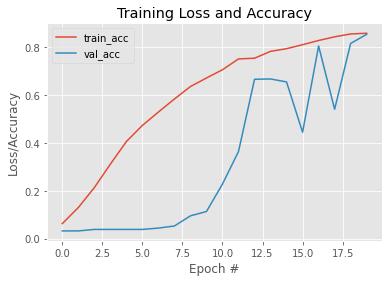

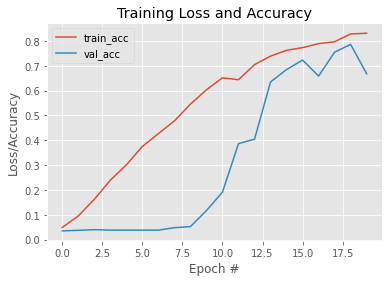

In [ ]:
trainY = to_categorical(trainY, 29)
from tensorflow.keras.regularizers import l1
tf.keras.backend.clear_session()


for pool_s in poolsize:
    valY = to_categorical(valY, 29)

    print('Pool Size :',pool_s)
    from tensorflow.keras.regularizers import l2
    model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,pool_s)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print("[INFO] training network...")
    maxIt = 20
    H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

    print('\n Test accuracy')
    predictedY = model.predict(valX)
    predictedY = predictedY.argmax(axis=1)
    valY = valY.argmax(axis=1)
    print(classification_report(valY, predictedY))

    print(model.summary())

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
    # plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

The pool size is (2,2).

## Optimizers:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

### Adam:

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 97ms/step - loss: 4.0076 - accuracy: 0.0691 - val_loss: 3.6092 - val_accuracy: 0.0331
Epoch 2/20
50/50 [==============================] - 4s 84ms/step - loss: 3.0387 - accuracy: 0.1394 - val_loss: 3.8589 - val_accuracy: 0.0388
Epoch 3/20
50/50 [==============================] - 4s 84ms/step - loss: 2.5876 - accuracy: 0.2369 - val_loss: 4.1881 - val_accuracy: 0.0444
Epoch 4/20
50/50 [==============================] - 4s 85ms/step - loss: 2.2025 - accuracy: 0.3223 - val_loss: 4.8791 - val_accuracy: 0.0312
Epoch 5/20
50/50 [==============================] - 4s 85ms/step - loss: 1.9352 - accuracy: 0.4028 - val_loss: 9.6103 - val_accuracy: 0.0338
Epoch 6/20
50/50 [==============================] - 4s 85ms/step - loss: 1.6945 - accuracy: 0.4558 - val_loss: 14.3508 - val_accuracy: 0.0406
Epoch 7/20
50/50 [==============================] - 4s 86ms/step - loss: 1.5145 - accuracy: 0.5091 - val_loss: 18.3139 - val_a

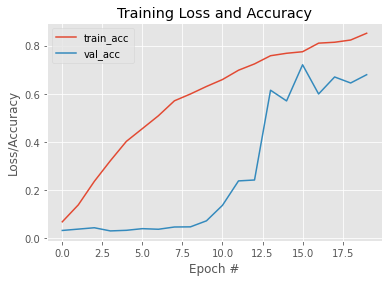

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

### SGD (0.01):

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 95ms/step - loss: 4.2352 - accuracy: 0.0419 - val_loss: 3.3955 - val_accuracy: 0.0381
Epoch 2/20
50/50 [==============================] - 4s 83ms/step - loss: 3.6445 - accuracy: 0.0902 - val_loss: 3.4669 - val_accuracy: 0.0262
Epoch 3/20
50/50 [==============================] - 4s 83ms/step - loss: 3.2810 - accuracy: 0.1423 - val_loss: 3.5694 - val_accuracy: 0.0362
Epoch 4/20
50/50 [==============================] - 4s 83ms/step - loss: 2.9087 - accuracy: 0.1970 - val_loss: 3.7449 - val_accuracy: 0.0456
Epoch 5/20
50/50 [==============================] - 4s 83ms/step - loss: 2.6388 - accuracy: 0.2419 - val_loss: 4.1308 - val_accuracy: 0.0388
Epoch 6/20
50/50 [==============================] - 4s 83ms/step - loss: 2.3788 - accuracy: 0.2903 - val_loss: 4.7541 - val_accuracy: 0.0650
Epoch 7/20
50/50 [==============================] - 4s 84ms/step - loss: 2.2348 - accuracy: 0.3223 - val_loss: 3.9552 - val_acc

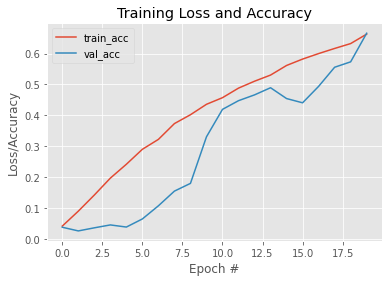

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.01), metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

### SGD(0.001):

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 96ms/step - loss: 4.4495 - accuracy: 0.0331 - val_loss: 3.4010 - val_accuracy: 0.0344
Epoch 2/20
50/50 [==============================] - 4s 83ms/step - loss: 4.4379 - accuracy: 0.0334 - val_loss: 3.4479 - val_accuracy: 0.0344
Epoch 3/20
50/50 [==============================] - 4s 83ms/step - loss: 4.3045 - accuracy: 0.0373 - val_loss: 3.4944 - val_accuracy: 0.0344
Epoch 4/20
50/50 [==============================] - 4s 83ms/step - loss: 4.2954 - accuracy: 0.0377 - val_loss: 3.5319 - val_accuracy: 0.0344
Epoch 5/20
50/50 [==============================] - 4s 83ms/step - loss: 4.2240 - accuracy: 0.0386 - val_loss: 3.5377 - val_accuracy: 0.0344
Epoch 6/20
50/50 [==============================] - 4s 83ms/step - loss: 4.2094 - accuracy: 0.0436 - val_loss: 3.5483 - val_accuracy: 0.0356
Epoch 7/20
50/50 [==============================] - 4s 84ms/step - loss: 4.2485 - accuracy: 0.0417 - val_loss: 3.5685 - val_acc

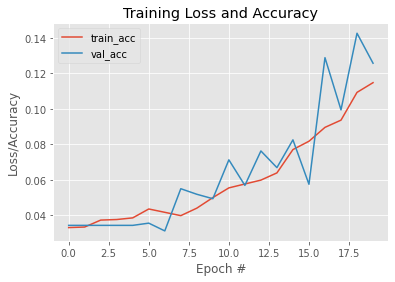

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.001), metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

### Adagrad:

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 107ms/step - loss: 4.4410 - accuracy: 0.0353 - val_loss: 3.3985 - val_accuracy: 0.0269
Epoch 2/20
50/50 [==============================] - 4s 87ms/step - loss: 4.4276 - accuracy: 0.0322 - val_loss: 3.4501 - val_accuracy: 0.0269
Epoch 3/20
50/50 [==============================] - 4s 87ms/step - loss: 4.4076 - accuracy: 0.0323 - val_loss: 3.4966 - val_accuracy: 0.0269
Epoch 4/20
50/50 [==============================] - 4s 87ms/step - loss: 4.3891 - accuracy: 0.0347 - val_loss: 3.5407 - val_accuracy: 0.0269
Epoch 5/20
50/50 [==============================] - 4s 87ms/step - loss: 4.3894 - accuracy: 0.0359 - val_loss: 3.5738 - val_accuracy: 0.0275
Epoch 6/20
50/50 [==============================] - 4s 87ms/step - loss: 4.3573 - accuracy: 0.0352 - val_loss: 3.6277 - val_accuracy: 0.0344
Epoch 7/20
50/50 [==============================] - 4s 87ms/step - loss: 4.3305 - accuracy: 0.0398 - val_loss: 3.6831 - val_ac

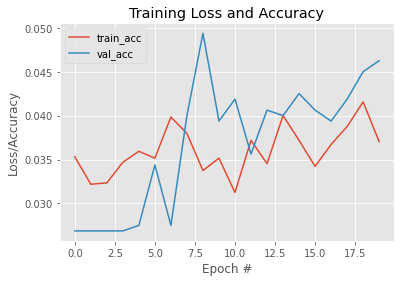

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

### Adadelta:

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 108ms/step - loss: 4.4616 - accuracy: 0.0372 - val_loss: 3.4186 - val_accuracy: 0.0338
Epoch 2/20
50/50 [==============================] - 4s 87ms/step - loss: 4.3741 - accuracy: 0.0377 - val_loss: 3.5000 - val_accuracy: 0.0338
Epoch 3/20
50/50 [==============================] - 4s 87ms/step - loss: 4.4354 - accuracy: 0.0333 - val_loss: 3.5625 - val_accuracy: 0.0338
Epoch 4/20
50/50 [==============================] - 4s 87ms/step - loss: 4.4162 - accuracy: 0.0330 - val_loss: 3.6205 - val_accuracy: 0.0338
Epoch 5/20
50/50 [==============================] - 4s 87ms/step - loss: 4.3401 - accuracy: 0.0405 - val_loss: 3.6302 - val_accuracy: 0.0338
Epoch 6/20
50/50 [==============================] - 4s 87ms/step - loss: 4.3670 - accuracy: 0.0377 - val_loss: 3.6400 - val_accuracy: 0.0319
Epoch 7/20
50/50 [==============================] - 4s 87ms/step - loss: 4.3399 - accuracy: 0.0338 - val_loss: 3.6540 - val_ac

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


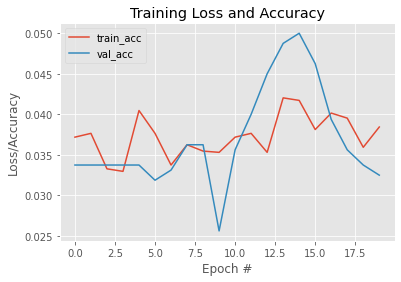

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

### Rmsprop:

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 102ms/step - loss: 3.9307 - accuracy: 0.0670 - val_loss: 3.6738 - val_accuracy: 0.0381
Epoch 2/20
50/50 [==============================] - 4s 89ms/step - loss: 3.1036 - accuracy: 0.1447 - val_loss: 4.0856 - val_accuracy: 0.0356
Epoch 3/20
50/50 [==============================] - 4s 90ms/step - loss: 2.5944 - accuracy: 0.2398 - val_loss: 15.9100 - val_accuracy: 0.0381
Epoch 4/20
50/50 [==============================] - 4s 90ms/step - loss: 2.0885 - accuracy: 0.3442 - val_loss: 6.8346 - val_accuracy: 0.0419
Epoch 5/20
50/50 [==============================] - 4s 90ms/step - loss: 1.7612 - accuracy: 0.4270 - val_loss: 50.9170 - val_accuracy: 0.0444
Epoch 6/20
50/50 [==============================] - 4s 90ms/step - loss: 1.4211 - accuracy: 0.5352 - val_loss: 38.2374 - val_accuracy: 0.0450
Epoch 7/20
50/50 [==============================] - 5s 90ms/step - loss: 1.1569 - accuracy: 0.6087 - val_loss: 43.3529 - va

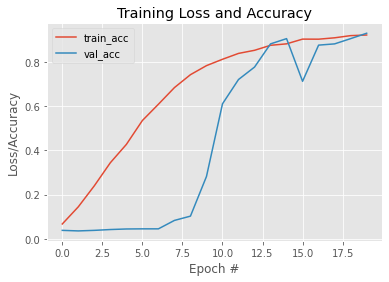

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

### Adamax:

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 99ms/step - loss: 4.3360 - accuracy: 0.0486 - val_loss: 3.4531 - val_accuracy: 0.0244
Epoch 2/20
50/50 [==============================] - 4s 86ms/step - loss: 3.5117 - accuracy: 0.0725 - val_loss: 3.5571 - val_accuracy: 0.0381
Epoch 3/20
50/50 [==============================] - 4s 87ms/step - loss: 3.2696 - accuracy: 0.1061 - val_loss: 3.6874 - val_accuracy: 0.0244
Epoch 4/20
50/50 [==============================] - 4s 87ms/step - loss: 3.0793 - accuracy: 0.1378 - val_loss: 3.9069 - val_accuracy: 0.0281
Epoch 5/20
50/50 [==============================] - 4s 87ms/step - loss: 2.8582 - accuracy: 0.1786 - val_loss: 4.4998 - val_accuracy: 0.0325
Epoch 6/20
50/50 [==============================] - 4s 87ms/step - loss: 2.6964 - accuracy: 0.2105 - val_loss: 7.0551 - val_accuracy: 0.0388
Epoch 7/20
50/50 [==============================] - 4s 87ms/step - loss: 2.5546 - accuracy: 0.2428 - val_loss: 9.7512 - val_acc

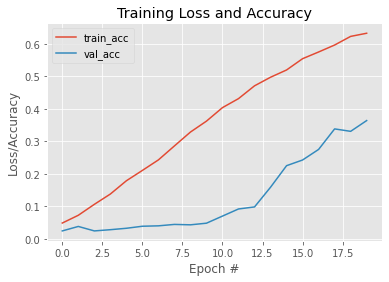

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adamax', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

### Nadam:

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 6s 113ms/step - loss: 4.0537 - accuracy: 0.0653 - val_loss: 3.5480 - val_accuracy: 0.0344
Epoch 2/20
50/50 [==============================] - 5s 99ms/step - loss: 3.0074 - accuracy: 0.1567 - val_loss: 3.5975 - val_accuracy: 0.0425
Epoch 3/20
50/50 [==============================] - 5s 100ms/step - loss: 2.5002 - accuracy: 0.2544 - val_loss: 4.0524 - val_accuracy: 0.0325
Epoch 4/20
50/50 [==============================] - 5s 99ms/step - loss: 2.1001 - accuracy: 0.3564 - val_loss: 13.7926 - val_accuracy: 0.0369
Epoch 5/20
50/50 [==============================] - 5s 100ms/step - loss: 1.8171 - accuracy: 0.4186 - val_loss: 20.9950 - val_accuracy: 0.0362
Epoch 6/20
50/50 [==============================] - 5s 100ms/step - loss: 1.6366 - accuracy: 0.4634 - val_loss: 31.4172 - val_accuracy: 0.0381
Epoch 7/20
50/50 [==============================] - 5s 101ms/step - loss: 1.3852 - accuracy: 0.5364 - val_loss: 34.7169 

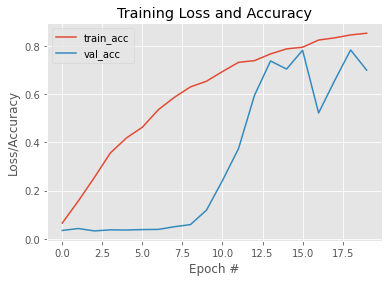

In [ ]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()

valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Since rmsprop gives a better accuracy, I will be using this to tune my final model.

# Kernel Weight Initialization Method:

## Glorot_Uniform:

In [16]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 99ms/step - loss: 4.0299 - accuracy: 0.0628 - val_loss: 3.9456 - val_accuracy: 0.0388
Epoch 2/20
50/50 [==============================] - 4s 87ms/step - loss: 3.0590 - accuracy: 0.1392 - val_loss: 3.9291 - val_accuracy: 0.0400
Epoch 3/20
50/50 [==============================] - 4s 87ms/step - loss: 2.6771 - accuracy: 0.2277 - val_loss: 3.8673 - val_accuracy: 0.0400
Epoch 4/20
50/50 [==============================] - 4s 86ms/step - loss: 2.3279 - accuracy: 0.3039 - val_loss: 5.2896 - val_accuracy: 0.0381
Epoch 5/20
50/50 [==============================] - 4s 88ms/step - loss: 1.9857 - accuracy: 0.3847 - val_loss: 8.3130 - val_accuracy: 0.0381
Epoch 6/20
50/50 [==============================] - 4s 88ms/step - loss: 1.7557 - accuracy: 0.4433 - val_loss: 5.9071 - val_accuracy: 0.0369
Epoch 7/20
50/50 [==============================] - 4s 88ms/step - loss: 1.5085 - accuracy: 0.5077 - val_loss: 6.9276 - val_acc

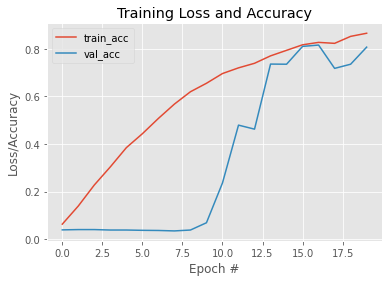

In [17]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()
from keras.initializers import glorot_uniform
valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Random_normal:

In [27]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer =random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 97ms/step - loss: 4.0711 - accuracy: 0.0636 - val_loss: 3.7090 - val_accuracy: 0.0306
Epoch 2/20
50/50 [==============================] - 4s 86ms/step - loss: 2.9909 - accuracy: 0.1538 - val_loss: 3.7561 - val_accuracy: 0.0269
Epoch 3/20
50/50 [==============================] - 4s 86ms/step - loss: 2.5602 - accuracy: 0.2405 - val_loss: 4.3000 - val_accuracy: 0.0306
Epoch 4/20
50/50 [==============================] - 4s 87ms/step - loss: 2.1532 - accuracy: 0.3348 - val_loss: 5.0714 - val_accuracy: 0.0294
Epoch 5/20
50/50 [==============================] - 4s 87ms/step - loss: 1.8030 - accuracy: 0.4227 - val_loss: 5.1052 - val_accuracy: 0.0394
Epoch 6/20
50/50 [==============================] - 4s 87ms/step - loss: 1.5619 - accuracy: 0.4830 - val_loss: 6.7278 - val_accuracy: 0.0394
Epoch 7/20
50/50 [==============================] - 4s 87ms/step - loss: 1.3683 - accuracy: 0.5377 - val_loss: 7.8675 - val_acc

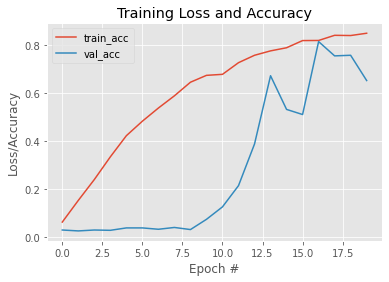

In [28]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()
from keras.initializers import random_normal
valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Random_Uniform:

In [7]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = random_uniform(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 96ms/step - loss: 3.7711 - accuracy: 0.0986 - val_loss: 3.5973 - val_accuracy: 0.0338
Epoch 2/20
50/50 [==============================] - 4s 85ms/step - loss: 2.7064 - accuracy: 0.2216 - val_loss: 3.6638 - val_accuracy: 0.0375
Epoch 3/20
50/50 [==============================] - 4s 84ms/step - loss: 2.2253 - accuracy: 0.3189 - val_loss: 3.7380 - val_accuracy: 0.0312
Epoch 4/20
50/50 [==============================] - 4s 85ms/step - loss: 1.9280 - accuracy: 0.3903 - val_loss: 4.0278 - val_accuracy: 0.0306
Epoch 5/20
50/50 [==============================] - 4s 85ms/step - loss: 1.6417 - accuracy: 0.4745 - val_loss: 4.3400 - val_accuracy: 0.0381
Epoch 6/20
50/50 [==============================] - 4s 85ms/step - loss: 1.4857 - accuracy: 0.5172 - val_loss: 5.3278 - val_accuracy: 0.0294
Epoch 7/20
50/50 [==============================] - 4s 85ms/step - loss: 1.3528 - accuracy: 0.5497 - val_loss: 9.1694 - val_acc

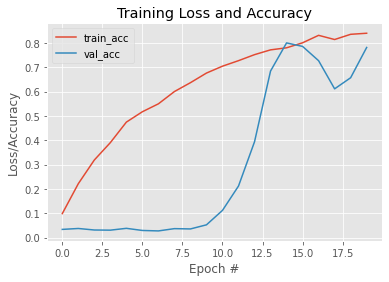

In [8]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()
from keras.initializers import random_uniform
valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Truncated_Normal:

In [18]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = truncated_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 97ms/step - loss: 3.9841 - accuracy: 0.0653 - val_loss: 3.7170 - val_accuracy: 0.0306
Epoch 2/20
50/50 [==============================] - 4s 85ms/step - loss: 3.0047 - accuracy: 0.1541 - val_loss: 3.6795 - val_accuracy: 0.0350
Epoch 3/20
50/50 [==============================] - 4s 85ms/step - loss: 2.4179 - accuracy: 0.2587 - val_loss: 3.8580 - val_accuracy: 0.0306
Epoch 4/20
50/50 [==============================] - 4s 85ms/step - loss: 1.9842 - accuracy: 0.3589 - val_loss: 4.1623 - val_accuracy: 0.0381
Epoch 5/20
50/50 [==============================] - 4s 85ms/step - loss: 1.6204 - accuracy: 0.4727 - val_loss: 4.4759 - val_accuracy: 0.0381
Epoch 6/20
50/50 [==============================] - 4s 86ms/step - loss: 1.4390 - accuracy: 0.5266 - val_loss: 7.2762 - val_accuracy: 0.0381
Epoch 7/20
50/50 [==============================] - 4s 86ms/step - loss: 1.2216 - accuracy: 0.5892 - val_loss: 8.8754 - val_acc

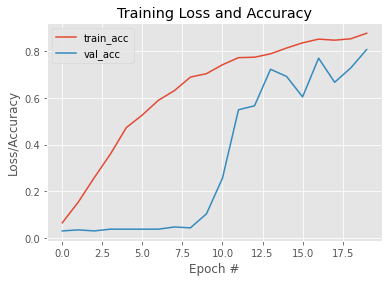

In [19]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()
from keras.initializers import truncated_normal
valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Zeros:

In [7]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = zeros()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 94ms/step - loss: 3.3684 - accuracy: 0.0345 - val_loss: 3.3673 - val_accuracy: 0.0388
Epoch 2/20
50/50 [==============================] - 4s 82ms/step - loss: 3.3673 - accuracy: 0.0375 - val_loss: 3.3677 - val_accuracy: 0.0388
Epoch 3/20
50/50 [==============================] - 4s 83ms/step - loss: 3.3673 - accuracy: 0.0392 - val_loss: 3.3678 - val_accuracy: 0.0388
Epoch 4/20
50/50 [==============================] - 4s 83ms/step - loss: 3.3672 - accuracy: 0.0358 - val_loss: 3.3676 - val_accuracy: 0.0388
Epoch 5/20
50/50 [==============================] - 4s 83ms/step - loss: 3.3671 - accuracy: 0.0392 - val_loss: 3.3673 - val_accuracy: 0.0388
Epoch 6/20
50/50 [==============================] - 4s 83ms/step - loss: 3.3675 - accuracy: 0.0380 - val_loss: 3.3674 - val_accuracy: 0.0388
Epoch 7/20
50/50 [==============================] - 4s 83ms/step - loss: 3.3672 - accuracy: 0.0359 - val_loss: 3.3677 - val_acc

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


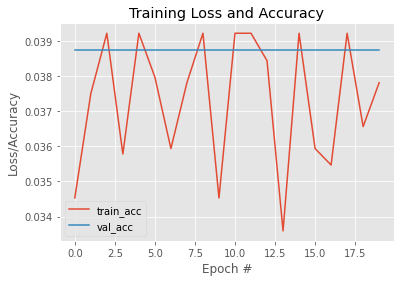

In [8]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()
from keras.initializers import zeros
valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Ones:

In [15]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = ones()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 99ms/step - loss: 4.1093 - accuracy: 0.0380 - val_loss: 160288.3750 - val_accuracy: 0.0319
Epoch 2/20
50/50 [==============================] - 4s 87ms/step - loss: 3.6923 - accuracy: 0.0370 - val_loss: 1312.5125 - val_accuracy: 0.0381
Epoch 3/20
50/50 [==============================] - 4s 88ms/step - loss: 3.6564 - accuracy: 0.0377 - val_loss: 95.4211 - val_accuracy: 0.0325
Epoch 4/20
50/50 [==============================] - 4s 88ms/step - loss: 3.6570 - accuracy: 0.0392 - val_loss: 11.5843 - val_accuracy: 0.0312
Epoch 5/20
50/50 [==============================] - 4s 88ms/step - loss: 3.6179 - accuracy: 0.0373 - val_loss: 5.9063 - val_accuracy: 0.0606
Epoch 6/20
50/50 [==============================] - 4s 89ms/step - loss: 3.6000 - accuracy: 0.0391 - val_loss: 3.9764 - val_accuracy: 0.0413
Epoch 7/20
50/50 [==============================] - 4s 89ms/step - loss: 3.6362 - accuracy: 0.0375 - val_loss: 4.1031

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


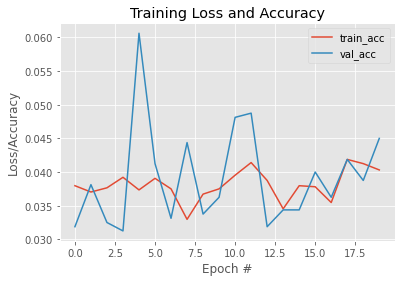

In [16]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()
from keras.initializers import ones
valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Glorot_Normal:

In [23]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 99ms/step - loss: 4.0065 - accuracy: 0.0653 - val_loss: 3.7107 - val_accuracy: 0.0281
Epoch 2/20
50/50 [==============================] - 4s 88ms/step - loss: 2.9943 - accuracy: 0.1523 - val_loss: 3.8586 - val_accuracy: 0.0281
Epoch 3/20
50/50 [==============================] - 4s 89ms/step - loss: 2.4961 - accuracy: 0.2459 - val_loss: 4.0777 - val_accuracy: 0.0381
Epoch 4/20
50/50 [==============================] - 4s 89ms/step - loss: 2.0463 - accuracy: 0.3569 - val_loss: 4.7279 - val_accuracy: 0.0381
Epoch 5/20
50/50 [==============================] - 5s 90ms/step - loss: 1.7171 - accuracy: 0.4462 - val_loss: 6.2919 - val_accuracy: 0.0381
Epoch 6/20
50/50 [==============================] - 4s 90ms/step - loss: 1.4115 - accuracy: 0.5280 - val_loss: 9.4546 - val_accuracy: 0.0388
Epoch 7/20
50/50 [==============================] - 4s 89ms/step - loss: 1.1680 - accuracy: 0.6000 - val_loss: 9.8320 - val_acc

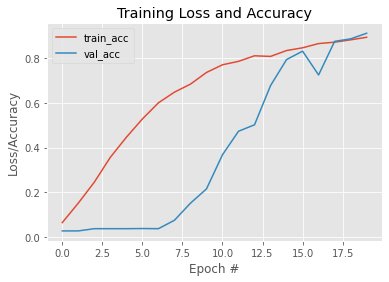

In [24]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()
from keras.initializers import glorot_normal
valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Variant Scaling:

In [30]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = variance_scaling(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 100ms/step - loss: 4.0122 - accuracy: 0.0628 - val_loss: 3.6617 - val_accuracy: 0.0306
Epoch 2/20
50/50 [==============================] - 4s 89ms/step - loss: 3.1199 - accuracy: 0.1309 - val_loss: 3.8342 - val_accuracy: 0.0356
Epoch 3/20
50/50 [==============================] - 4s 90ms/step - loss: 2.6031 - accuracy: 0.2255 - val_loss: 4.1214 - val_accuracy: 0.0250
Epoch 4/20
50/50 [==============================] - 4s 89ms/step - loss: 2.1042 - accuracy: 0.3392 - val_loss: 5.2282 - val_accuracy: 0.0369
Epoch 5/20
50/50 [==============================] - 5s 90ms/step - loss: 1.7574 - accuracy: 0.4283 - val_loss: 5.3406 - val_accuracy: 0.0369
Epoch 6/20
50/50 [==============================] - 4s 90ms/step - loss: 1.4721 - accuracy: 0.5036 - val_loss: 5.4890 - val_accuracy: 0.0562
Epoch 7/20
50/50 [==============================] - 4s 90ms/step - loss: 1.3069 - accuracy: 0.5577 - val_loss: 9.1544 - val_ac

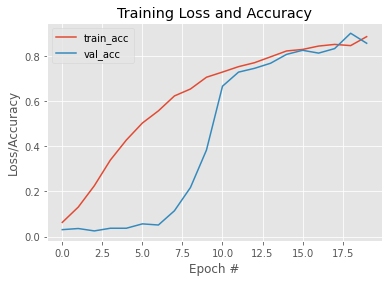

In [31]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()
from keras.initializers import variance_scaling
valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Constant:

In [8]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = constant()))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/20
50/50 [==============================] - 5s 95ms/step - loss: 3.3681 - accuracy: 0.0356 - val_loss: 3.3669 - val_accuracy: 0.0388
Epoch 2/20
50/50 [==============================] - 4s 82ms/step - loss: 3.3674 - accuracy: 0.0391 - val_loss: 3.3670 - val_accuracy: 0.0388
Epoch 3/20
50/50 [==============================] - 4s 82ms/step - loss: 3.3673 - accuracy: 0.0381 - val_loss: 3.3669 - val_accuracy: 0.0400
Epoch 4/20
50/50 [==============================] - 4s 82ms/step - loss: 3.3678 - accuracy: 0.0367 - val_loss: 3.3671 - val_accuracy: 0.0388
Epoch 5/20
50/50 [==============================] - 4s 82ms/step - loss: 3.3673 - accuracy: 0.0323 - val_loss: 3.3672 - val_accuracy: 0.0388
Epoch 6/20
50/50 [==============================] - 4s 83ms/step - loss: 3.3676 - accuracy: 0.0392 - val_loss: 3.3669 - val_accuracy: 0.0388
Epoch 7/20
50/50 [==============================] - 4s 82ms/step - loss: 3.3672 - accuracy: 0.0367 - val_loss: 3.3678 - val_acc

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


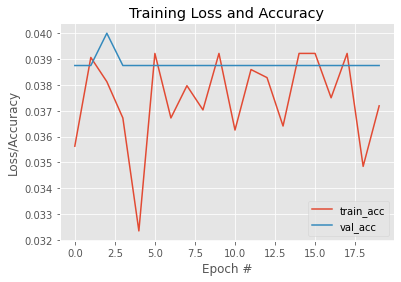

In [9]:
trainY = to_categorical(trainY, 29)

tf.keras.backend.clear_session()
from keras.initializers import constant
valY = to_categorical(valY, 29)

from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 20
H = model.fit(trainX, trainY, validation_split = 0.20, batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(valX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
print(classification_report(valY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

We can see that glorot normal gave higher accuracy than others.

# **Final Code** :

After tuning all the hyperparameters, I am going to place all the values and acquire a final accuracy. I will be sending more data to train my final model.

In [10]:
############################################################################################################################## 

(trainX, valX, trainY, valY) = train_test_split(X[:70000], y[:70000], test_size=0.20, random_state=1)

trainX = trainX.astype('float32')/255.0
valX = valX.astype('float32')/255.0
testX = X[70000:].astype('float32')/255.0
testY =  y[70000:]

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)

(56000, 75, 75, 3)
(56000,)
(17028, 75, 75, 3)
(17028,)
(14000, 75, 75, 3)
(14000,)


## Code without kernel initalization:

In [ ]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/80
438/438 [==============================] - 41s 93ms/step - loss: 2.3096 - accuracy: 0.3245 - val_loss: 4.7573 - val_accuracy: 0.1219
Epoch 2/80
438/438 [==============================] - 41s 94ms/step - loss: 0.7879 - accuracy: 0.7258 - val_loss: 1.7799 - val_accuracy: 0.6215
Epoch 3/80
438/438 [==============================] - 41s 93ms/step - loss: 0.4006 - accuracy: 0.8580 - val_loss: 0.4693 - val_accuracy: 0.8687
Epoch 4/80
438/438 [==============================] - 41s 94ms/step - loss: 0.2496 - accuracy: 0.9115 - val_loss: 0.3251 - val_accuracy: 0.9069
Epoch 5/80
438/438 [==============================] - 41s 93ms/step - loss: 0.1706 - accuracy: 0.9414 - val_loss: 0.5854 - val_accuracy: 0.8505
Epoch 6/80
438/438 [==============================] - 41s 93ms/step - loss: 0.1409 - accuracy: 0.9524 - val_loss: 1.0411 - val_accuracy: 0.7766
Epoch 7/80
438/438 [==============================] - 41s 93ms/step - loss: 0.1119 - accuracy: 0.9641 - val_l

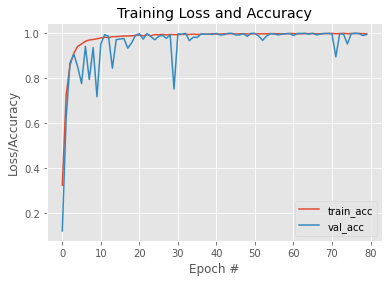

In [ ]:
trainY = to_categorical(trainY, 29)
valY = to_categorical(valY, 29)
testY = to_categorical(testY, 29)

tf.keras.backend.clear_session()


from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 80
H = model.fit(trainX, trainY, validation_data = (valX,valY), batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
testY = testY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(classification_report(testY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## Code with weight initialization:

In [11]:
class VGGNet19:
    def build(height, width, depth, classes,drop,Filter_size,Filter_size2,Filter_size3,Filter_size4,Layer_Size,L1,L2,poolsize):
        model = Sequential(name = 'VGGNet19')
        
        # conv 1
        #model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1)))
        model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (height, width, depth),activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 3
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        #model.add(Conv2D(256,(3,3), padding = 'same',activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(16, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 5
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(64, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 8
        model.add(Conv2D(64,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 9
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 11
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        # conv 13
        model.add(Conv2D(32, (3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 14
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 15
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 16
        model.add(Conv2D(32,(3,3), padding = 'same',activity_regularizer = l1(L1),kernel_initializer = glorot_normal(seed=0)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Dropout(0.2))
        
        model.add(Flatten())
        
        # fc 17
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 18
        model.add(Dense(4096,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # fc 19
        model.add(Dense(1000,activity_regularizer = l1(L1)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        # softmax classifier
        model.add(Dense(classes,activity_regularizer = l1(L1)))
        model.add(Activation('softmax'))
        
        # return the model
        return model

[INFO] training network...
Epoch 1/80
438/438 [==============================] - 43s 98ms/step - loss: 1.9385 - accuracy: 0.4193 - val_loss: 7.0424 - val_accuracy: 0.0964
Epoch 2/80
438/438 [==============================] - 42s 95ms/step - loss: 0.5605 - accuracy: 0.8008 - val_loss: 0.9772 - val_accuracy: 0.7413
Epoch 3/80
438/438 [==============================] - 42s 95ms/step - loss: 0.2850 - accuracy: 0.9004 - val_loss: 0.1489 - val_accuracy: 0.9466
Epoch 4/80
438/438 [==============================] - 42s 95ms/step - loss: 0.1840 - accuracy: 0.9364 - val_loss: 0.1796 - val_accuracy: 0.9451
Epoch 5/80
438/438 [==============================] - 42s 95ms/step - loss: 0.1341 - accuracy: 0.9544 - val_loss: 0.5419 - val_accuracy: 0.8859
Epoch 6/80
438/438 [==============================] - 42s 95ms/step - loss: 0.0989 - accuracy: 0.9673 - val_loss: 0.1008 - val_accuracy: 0.9689
Epoch 7/80
438/438 [==============================] - 42s 95ms/step - loss: 0.0954 - accuracy: 0.9687 - val_l

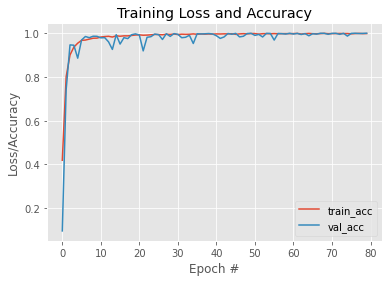

In [12]:
trainY = to_categorical(trainY, 29)
valY = to_categorical(valY, 29)
testY = to_categorical(testY, 29)
from keras.initializers import glorot_normal
tf.keras.backend.clear_session()


from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
model = VGGNet19.build(75, 75, 3, 29,0.2,32,16,64,32,(3,3),0,0,(2,2))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print("[INFO] training network...")
maxIt = 80
H = model.fit(trainX, trainY, validation_data = (valX,valY), batch_size = 128, epochs = maxIt, verbose = 1)

print('\n Test accuracy')
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
valY = valY.argmax(axis=1)
testY = testY.argmax(axis=1)
trainY = trainY.argmax(axis=1)
print(classification_report(testY, predictedY))

print(model.summary())

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
# plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, maxIt), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, maxIt), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()